<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/Technical-task/blob/main/Data_analysis_technical_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('anon_data.csv')

<ipython-input-2-1ad428991eb6>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/sample.csv')


In [3]:
df.head(5)

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
0,100002803,2913843,10,02/04/21,2,Microsoft,Operating System Software,1000477.0,254.213783,1.271048,0.0,Components North
1,100003323,2918083,50,02/04/21,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North
2,100016168,2916878,20,02/04/21,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North
3,100001590,2470475,10,02/04/21,10,Lenovo,Notebook Computers,1000133.0,21362.979640,133.944138,0.0,Corporate South
4,100001590,2544987,10,02/04/21,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South


### 1. Categorical and Numerical Columns

In [4]:
# Get a list of all the column names in your dataframe
cols = df.columns.tolist()

# Separate the categorical and numerical columns into two lists
cat_cols = []
num_cols = []
for col in cols:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

print("Categorical Columns: ", cat_cols)
print("Numerical Columns: ", num_cols)

Categorical Columns:  ['SalesOrderNumber', 'ShipDate', 'Qty', 'Brand', 'ProductType', 'SalesTeamName']
Numerical Columns:  ['CustomerId', 'SalesOrderLineNumber', 'ProductSupplierID', 'Revenue', 'Profit', 'Freight cost']


In [5]:
df.count()

CustomerId              488711
SalesOrderNumber        488711
SalesOrderLineNumber    488711
ShipDate                488711
Qty                     488711
Brand                   488630
ProductType             488630
ProductSupplierID       486423
Revenue                 488711
Profit                  488711
Freight cost            488711
SalesTeamName           488711
dtype: int64

In [6]:
#Correlation between columns
df.corr()

<ipython-input-6-0f1e6be83fe8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerId,SalesOrderLineNumber,ProductSupplierID,Revenue,Profit,Freight cost
CustomerId,1.000000,0.088229,0.027744,-0.009986,0.003497,-0.008192
SalesOrderLineNumber,0.088229,1.000000,0.022052,-0.005696,-0.001863,-0.025943
ProductSupplierID,0.027744,0.022052,1.000000,-0.004865,0.003746,0.000141
Revenue,-0.009986,-0.005696,-0.004865,1.000000,0.189083,0.177453
Profit,0.003497,-0.001863,0.003746,0.189083,1.000000,0.078941
Freight cost,-0.008192,-0.025943,0.000141,0.177453,0.078941,1.000000


<ipython-input-7-eb1df1312fbd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= df.corr()


<Axes: >

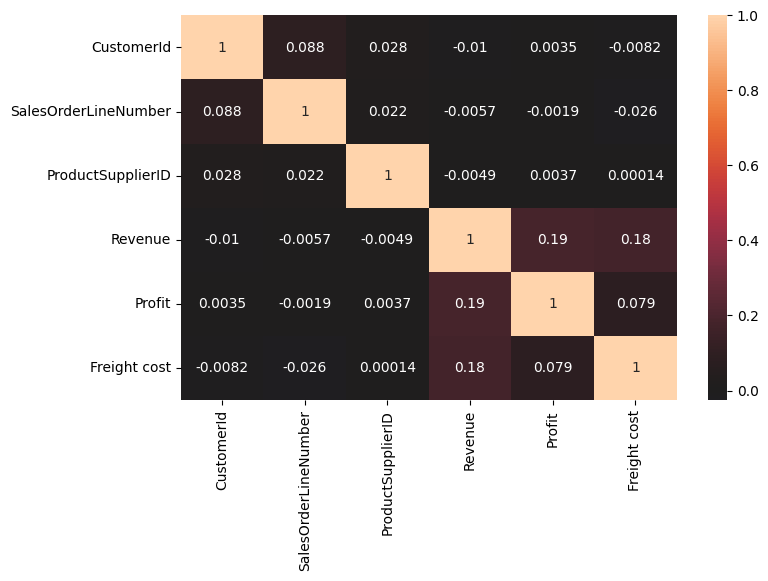

In [7]:
#correlation matrix
corrmat= df.corr()

plt.figure(figsize=(8,5))  
sns.heatmap(corrmat,annot=True, center=0)

### 2. Data Cleaning
  Missing values in data

In [8]:
#checking number of na values in each column
df.isna().sum()

CustomerId                 0
SalesOrderNumber           0
SalesOrderLineNumber       0
ShipDate                   0
Qty                        0
Brand                     81
ProductType               81
ProductSupplierID       2288
Revenue                    0
Profit                     0
Freight cost               0
SalesTeamName              0
dtype: int64

Percentage of Missing values for each column

In [9]:
#percentage of missing data in each column
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

CustomerId              0.000000
SalesOrderNumber        0.000000
SalesOrderLineNumber    0.000000
ShipDate                0.000000
Qty                     0.000000
Brand                   0.016574
ProductType             0.016574
ProductSupplierID       0.468170
Revenue                 0.000000
Profit                  0.000000
Freight cost            0.000000
SalesTeamName           0.000000
dtype: float64

Brand and product type and missing percentage is negligible when compared to total count but almost 4.6% of product type is missing

In [10]:
#dropping the missing data 
df=df.dropna(subset=['Brand', 'ProductType', 'ProductSupplierID'])

In [11]:
df.isna().sum()

CustomerId              0
SalesOrderNumber        0
SalesOrderLineNumber    0
ShipDate                0
Qty                     0
Brand                   0
ProductType             0
ProductSupplierID       0
Revenue                 0
Profit                  0
Freight cost            0
SalesTeamName           0
dtype: int64

In [12]:
# display the data types of each column
print(df.dtypes)

CustomerId                int64
SalesOrderNumber         object
SalesOrderLineNumber      int64
ShipDate                 object
Qty                      object
Brand                    object
ProductType              object
ProductSupplierID       float64
Revenue                 float64
Profit                  float64
Freight cost            float64
SalesTeamName            object
dtype: object


In [13]:
df['CustomerId'] = df['CustomerId'].astype(str)
df['ProductSupplierID'] = df['ProductSupplierID'].astype(str)


df['Qty'] = df['Qty'].str.replace(',', '').astype(int)

df["ShipDate"] = pd.to_datetime(df["ShipDate"])

In [14]:
# display the data types of each column
print(df.dtypes)

CustomerId                      object
SalesOrderNumber                object
SalesOrderLineNumber             int64
ShipDate                datetime64[ns]
Qty                              int64
Brand                           object
ProductType                     object
ProductSupplierID               object
Revenue                        float64
Profit                         float64
Freight cost                   float64
SalesTeamName                   object
dtype: object


Distinct columns

In [15]:
df.nunique()

CustomerId                3316
SalesOrderNumber        374414
SalesOrderLineNumber       105
ShipDate                   567
Qty                        858
Brand                      336
ProductType                422
ProductSupplierID          330
Revenue                 485423
Profit                  485631
Freight cost              8871
SalesTeamName                8
dtype: int64

In [16]:
df.apply(pd.unique)

CustomerId              [100002803, 100003323, 100016168, 100001590, 1...
SalesOrderNumber        [2913843, 2918083, 2916878, 2470475, 2544987, ...
SalesOrderLineNumber    [10, 50, 20, 30, 40, 70, 90, 100, 60, 130, 80,...
ShipDate                [2021-02-04T00:00:00.000000000, 2021-04-04T00:...
Qty                     [2, 1, 10, 5, 3, 32, 4, 64, 21, 22, 11, 6, 8, ...
Brand                   [Microsoft, Unknown, Lenovo, Dell, Startech, P...
ProductType             [Operating System Software, Utilities Software...
ProductSupplierID       [1000477.0, 1000465.0, 1000133.0, 1000003.0, 1...
Revenue                 [254.2137825, 191.6820013, 0.0, 21362.97964, 4...
Profit                  [1.271048069, 6.179373262, -8.011782598, 133.9...
Freight cost            [0.0, 0.13, 0.18, 0.27, 0.12, 16.14, 4.2, 8.4,...
SalesTeamName           [Components North, Corporate North, Corporate ...
dtype: object

Drop duplicate rows in the data

In [17]:
length = len(df)
length

486423

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
no_of_duplicates_removed = length - len(df)

print(f"{no_of_duplicates_removed} rows have been removed! \n remaining rows {length} rows.")

0 rows have been removed! 
 remaining rows 486423 rows.


Statistical analysis for revenue, profit, and freight cost

In [20]:
_#mean,median and mode of revenue, profit, and freight cost
mean_rev = df['Revenue'].mean()
median_rev = df['Revenue'].median()
std_rev = df['Revenue'].std()

mean_profit = df['Profit'].mean()
median_profit = df['Profit'].median()
std_profit = df['Profit'].std()

mean_fc = df['Freight cost'].mean()
median_fc = df['Freight cost'].median()
std_fc = df['Freight cost'].std()

print("Revenue: Mean={}, Median={}, StdDev={}".format(mean_rev, median_rev, std_rev))
print("Profit: Mean={}, Median={}, StdDev={}".format(mean_profit, median_profit, std_profit))
print("Freight Cost: Mean={}, Median={}, StdDev={}".format(mean_fc, median_fc, std_fc))

Revenue: Mean=958.2982141387427, Median=131.3865376, StdDev=6775.0054368398805
Profit: Mean=32.88865401365477, Median=4.860683523, StdDev=657.3572746390737
Freight Cost: Mean=7.275840102133327, Median=4.54, StdDev=36.188916836112085


Addition of year column in the data

In [21]:
# Add a new column to extract the year
df['year'] = pd.DatetimeIndex(df['ShipDate']).year


###3.Relation between SalesOrderNumber and SalesOrderLineNumber

In [22]:
# Group the data by SalesOrderNumber and calculate the maximum value of SalesOrderLineNumber for each group
max_order_lines = df.groupby('SalesOrderNumber')['SalesOrderLineNumber'].max()

# Calculate the mean of the maximum values
avg_order_lines = max_order_lines.mean()

print(f"On average, each SalesOrderNumber has {avg_order_lines:.2f} orders.")


On average, each SalesOrderNumber has 13.78 orders.


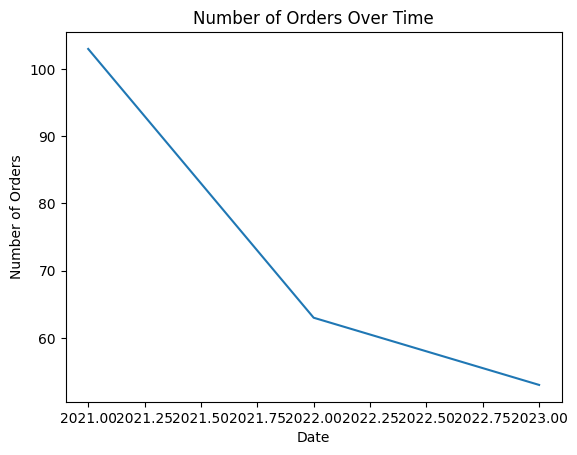

In [23]:
# Group by date and count the number of SalesOrderLineNumber per SalesOrderNumber
order_counts = df.groupby('year').apply(lambda x: x['SalesOrderLineNumber'].nunique())

# Plot the data over time
plt.plot(order_counts.index, order_counts.values)
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()


In [24]:
# group the data by SalesOrderNumber and calculate the mean and median of SalesOrderLineNumber
order_size = df.groupby('SalesOrderNumber')['SalesOrderLineNumber'].agg(['mean', 'median'])

# print the results
print(order_size)

                  mean  median
SalesOrderNumber              
192177            30.0    30.0
366982            20.0    20.0
837089            20.0    20.0
949927            25.0    25.0
1158375           10.0    10.0
...                ...     ...
O5011686          11.0    11.0
O5013803          11.0    11.0
O5015357           7.0     7.0
O5016928           1.0     1.0
O5017443           5.0     5.0

[374414 rows x 2 columns]


In [25]:
# group by SalesOrderNumber and create a new column with a tuple of SalesOrderLineNumber values for each order
df_grouped = df.groupby('SalesOrderNumber')['SalesOrderLineNumber'].apply(tuple).reset_index(name='OrderItems')

# count the frequency of each combination of SalesOrderLineNumbers
item_counts = pd.Series(df_grouped['OrderItems']).value_counts()

# print the top 10 most frequently ordered combinations
print(item_counts.head(10))

(10,)                   308503
(10, 20)                 27956
(20,)                     7092
(10, 20, 30)              5924
(20, 10)                  2767
(10, 20, 30, 40)          2731
(10, 10)                  2368
(30,)                     1233
(10, 20, 30, 40, 50)      1178
(10, 30)                   932
Name: OrderItems, dtype: int64


In [26]:
# Group by SalesOrderLineNumber and calculate distinct count of SalesOrderNumber
result = df.groupby('SalesOrderLineNumber')['SalesOrderNumber'].nunique()

# Convert the result to a DataFrame
result = pd.DataFrame({'SalesOrderLineNumber': result.index, 'DistinctSalesOrderCount': result.values})

# Display the result
print(result)

     SalesOrderLineNumber  DistinctSalesOrderCount
0                       1                       12
1                       2                        3
2                       3                        1
3                       5                        1
4                       7                        1
..                    ...                      ...
100                   980                        1
101                  1001                       22
102                  1011                        8
103                  1100                        1
104                  1120                        1

[105 rows x 2 columns]


In [27]:
result = df.groupby('SalesOrderNumber')['SalesOrderLineNumber'].count().reset_index()
result.head()

,SalesOrderNumber,SalesOrderLineNumber
0,192177,1
1,366982,3
2,837089,1
3,949927,2
4,1158375,1


### 4. Relation between Quantity with orders, Revenue, Profit

Quantity <0 - Returned or cancelled orders

In [28]:
# Convert the 'qty' column to numeric values
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

# Filter the dataset to only include rows where qty is negative
negative_qty = df[df['Qty'] < 0]

# Print the rows with negative qty
negative_qty.head()


,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName,year
112,100007970,60117266,10,2021-06-04,-1,Lenovo,Keyboard and Mouse,1000133.0,-25.468968,-0.346865,0.0,Corporate South,2021
151,100006285,60117395,10,2021-06-04,-9,STM,Tablet Cases,1000559.0,-147.925778,8.173999,0.0,Corporate South,2021
152,100006285,60117398,10,2021-06-04,-10,STM,Tablet Cases,1000559.0,-154.402312,8.307640,0.0,Corporate South,2021
168,100002069,60117429,10,2021-06-04,-1,Epson,Inkjet Printers,1000056.0,-105.559720,6.621511,0.0,SMB 1 North,2021
171,100007648,60117399,10,2021-06-04,-1,MSI,Graphics Cards,1000118.0,-89.580705,-2.889213,0.0,Components North,2021


In [29]:
# total number of returned or cancelled items
negative_qty.shape

(24820, 13)

In [30]:
# Group the data by year and count the number of returned orders
returned_orders = df[df['Qty'] < 0].groupby('year')['SalesOrderNumber'].count()

# Print the result
print(returned_orders)


year
2021    11307
2022     9925
2023     3588
Name: SalesOrderNumber, dtype: int64


In [31]:
# Group the data by year and count the number of unique order IDs in each group
orders_per_year = df.groupby('year')['SalesOrderNumber'].nunique()

# Print the results
print(orders_per_year)

year
2021    157711
2022    164418
2023     53460
Name: SalesOrderNumber, dtype: int64


Revenue and profit from returned orders alone

In [32]:
# Filter the dataset to include only the rows where Quantity is negative
returned_orders = df[df['Qty'] < 0]

# Calculate the total revenue and profit for the returned orders
total_returned_revenue = returned_orders['Revenue'].sum()
total_returned_profit = returned_orders['Profit'].sum()

print("Total revenue from returned orders:", total_returned_revenue)
print("Total profit from returned orders:", total_returned_profit)


Total revenue from returned orders: -13292989.320392473
Total profit from returned orders: 406694.924428898


<ipython-input-33-dc53f3691860>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  returned_orders_by_year = returned_orders.groupby('year')['Revenue', 'Profit'].sum()


<Axes: title={'center': 'Revenue and Profit from Returned Orders by Year'}, xlabel='year'>

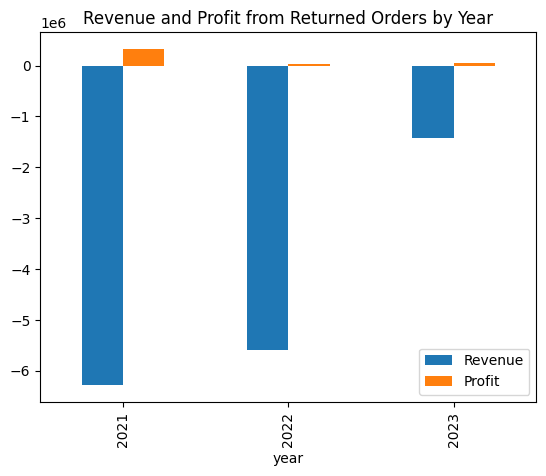

In [33]:
# Subset the data to only include returned orders
returned_orders = df[df['Qty'] < 0]

# Group the returned orders by year and calculate the sum of revenue and profit for each year
returned_orders_by_year = returned_orders.groupby('year')['Revenue', 'Profit'].sum()

# Visualize the results using a bar chart or line graph
returned_orders_by_year.plot(kind='bar', y=['Revenue', 'Profit'], title='Revenue and Profit from Returned Orders by Year')


comparison of Successfull and Returned orders with revenue and profit

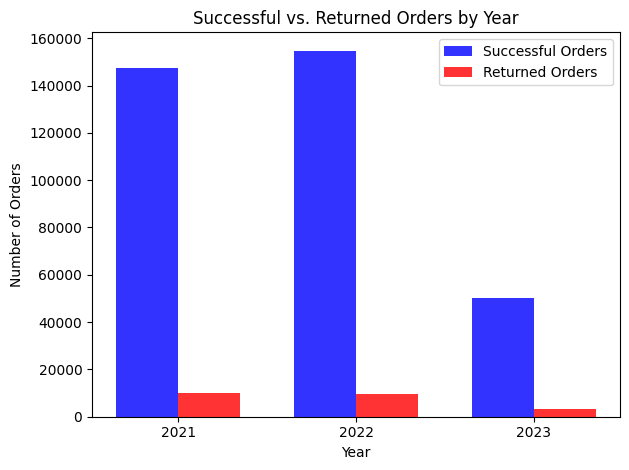

In [34]:
import matplotlib.pyplot as plt

# Calculate the total number of successful orders and returned orders for each year
successful_orders = df[df['Qty'] > 0].groupby('year')['SalesOrderNumber'].nunique()
returned_orders = df[df['Qty'] < 0].groupby('year')['SalesOrderNumber'].nunique()

# Create a side-by-side bar chart
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
index = successful_orders.index

rects1 = ax.bar(index, successful_orders, bar_width, alpha=opacity, color='b', label='Successful Orders')
rects2 = ax.bar(index + bar_width, returned_orders, bar_width, alpha=opacity, color='r', label='Returned Orders')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Orders')
ax.set_title('Successful vs. Returned Orders by Year')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

fig.tight_layout()
plt.show()


<ipython-input-35-5dba6a82ce0f>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  successful_rev_profit = successful_orders.groupby('year')['Revenue', 'Profit'].sum()
<ipython-input-35-5dba6a82ce0f>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  returned_rev_profit = returned_orders.groupby('year')['Revenue', 'Profit'].sum()


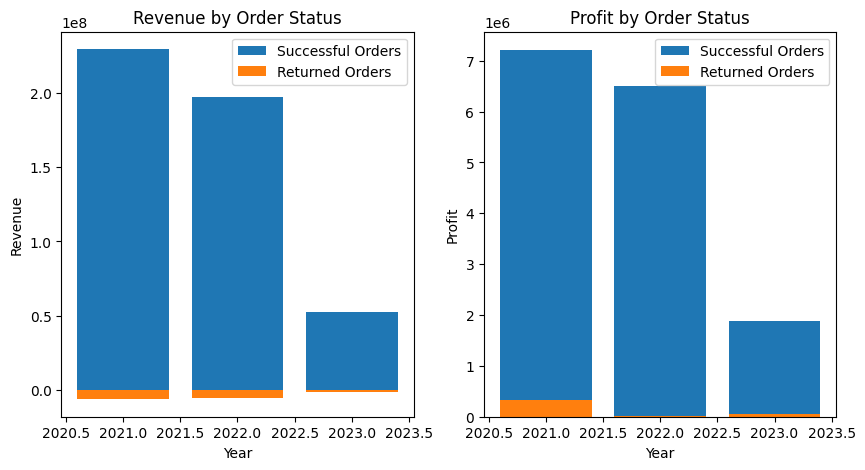

In [35]:
# Subset the data for successful orders and returned orders
successful_orders = df[df['Qty'] > 0]
returned_orders = df[df['Qty'] < 0]

# Calculate the total revenue and profit for successful orders and returned orders for each year
successful_rev_profit = successful_orders.groupby('year')['Revenue', 'Profit'].sum()
returned_rev_profit = returned_orders.groupby('year')['Revenue', 'Profit'].sum()

# Create bar charts to visualize the results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(successful_rev_profit.index, successful_rev_profit['Revenue'], label='Successful Orders')
axs[0].bar(returned_rev_profit.index, returned_rev_profit['Revenue'], label='Returned Orders')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Revenue')
axs[0].set_title('Revenue by Order Status')
axs[0].legend()

axs[1].bar(successful_rev_profit.index, successful_rev_profit['Profit'], label='Successful Orders')
axs[1].bar(returned_rev_profit.index, returned_rev_profit['Profit'], label='Returned Orders')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Profit')
axs[1].set_title('Profit by Order Status')
axs[1].legend()

plt.show()


### 5. Relation bertween customers and orders

In [36]:
d= df.groupby(['CustomerId', 'SalesOrderNumber', 'year']).agg({'ShipDate': pd.Series.nunique}).reset_index()


In [37]:
d.head(10)

,CustomerId,SalesOrderNumber,year,ShipDate
0,100000003,1006006356,2022,1
1,100000003,1006050865,2022,1
2,100000003,1006208027,2022,1
3,100000003,1006309839,2022,1
4,100000003,1006615276,2023,1
5,100000003,3318511,2021,1
6,100000005,1005938021,2022,2
7,100000005,1005960305,2022,1
8,100000005,2995817,2021,1
9,100000015,1005559694,2022,1


In [38]:
d.count()

CustomerId          375589
SalesOrderNumber    375589
year                375589
ShipDate            375589
dtype: int64

In [39]:
d['ShipDate'].value_counts()

1     360280
2      13202
3       1493
4        388
5        132
6         42
7         29
8         14
9          7
11         1
15         1
Name: ShipDate, dtype: int64

In [40]:
# Filter the dataframe to only include data from the year 2022
df_2022 = df[df['ShipDate'].dt.year == 2022]

# Group by customer ID and sales order number, and count the number of distinct ship dates
#d = df_2022.groupby(['CustomerId', 'SalesOrderNumber']).agg({'ShipDate': pd.Series.nunique}).reset_index()

In [41]:
d['ShipDate'].value_counts()

1     360280
2      13202
3       1493
4        388
5        132
6         42
7         29
8         14
9          7
11         1
15         1
Name: ShipDate, dtype: int64

### 6.Revenue Insights 
Relation between revenue and quantity
Average revenue per order,
Negative revenue, Total number of orders with negative revenue
Year on Year revenue comparisons

In [42]:
# Calculate the total revenue
total_revenue = df['Revenue'].sum()

# Calculate the total number of orders
total_orders = df['SalesOrderNumber'].nunique()

# Calculate the average revenue per order
average_revenue_per_order = total_revenue / total_orders

# Print the result
print('The average revenue per order is: ', average_revenue_per_order)

The average revenue per order is:  1244.9809361188675


What is the relationship between revenue and the number of items purchased (quantity)? 

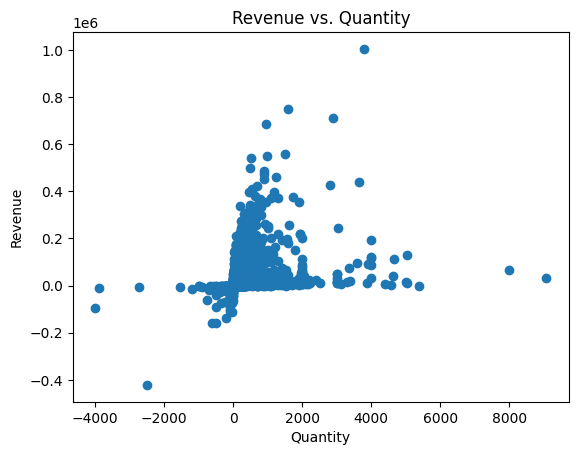

Correlation coefficient: 0.4132442886074178


In [43]:
# Create a scatter plot of revenue vs. quantity
plt.scatter(df['Qty'], df['Revenue'])
plt.title('Revenue vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()

# Calculate the correlation coefficient between revenue and quantity
corr_coef = df['Qty'].corr(df['Revenue'])
print('Correlation coefficient:', corr_coef)

A correlation coefficient of 0.4 indicates a moderate positive relationship between Revenue and Quantity

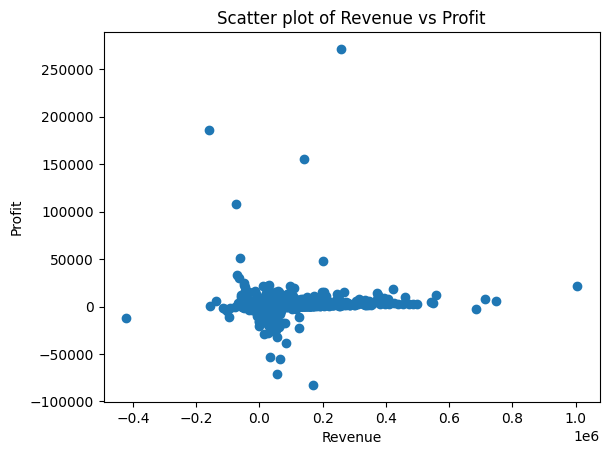

In [44]:
plt.scatter(df['Revenue'], df['Profit'])
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.title('Scatter plot of Revenue vs Profit')
plt.show()

Revenue less than zero

how many orders are having negative revenue?

In [45]:
average_revenue = df['Revenue'].mean()
print("Average Revenue: ", average_revenue)


Average Revenue:  958.2982141387427


In [46]:
# Count number of orders with negative revenue
num_neg_revenue_orders = len(df[df['Revenue'] < 0]['SalesOrderNumber'].unique())

print("Number of orders with negative revenue: ", num_neg_revenue_orders)


Number of orders with negative revenue:  22971


In [47]:
negative_orders = df[df['Revenue'] < 0]
total_negative_revenue = negative_orders['Revenue'].sum()
print("Total revenue for orders with negative revenue: ", total_negative_revenue)


Total revenue for orders with negative revenue:  -13292990.094810568


In [48]:
negative_revenue = df[df['Revenue'] < 0].groupby('year')['Revenue'].sum().reset_index()
print(negative_revenue)

   year       Revenue
0  2021 -6.279975e+06
1  2022 -5.586716e+06
2  2023 -1.426298e+06


<Axes: xlabel='year', ylabel='Revenue'>

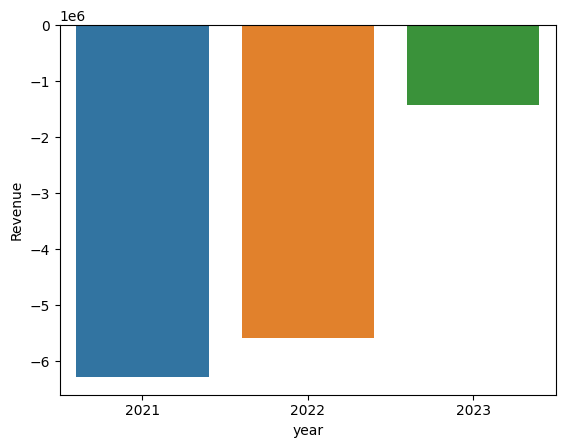

In [49]:

# Create a bar plot
sns.barplot(x='year', y='Revenue', data=negative_revenue)

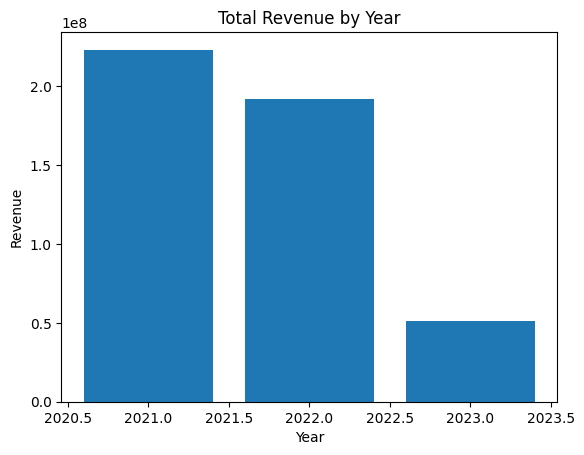

In [50]:
# Group the data by year and sum the revenue
yearly_revenue = df.groupby('year')['Revenue'].sum()

# Create a bar plot
plt.bar(yearly_revenue.index, yearly_revenue.values)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Total Revenue by Year')
plt.show()


###7. Profit Insights
profit less than zero

In [51]:
# Count number of orders with negative profit
num_neg_profit_orders = len(df[df['Profit'] < 0]['SalesOrderNumber'].unique())

print("Number of orders with negative profit: ", num_neg_profit_orders)

Number of orders with negative profit:  28160


In [52]:
negative_orders = df[df['Profit'] < 0]
total_negative_profit = negative_orders['Profit'].sum()
print("Total profit for orders with negative profit: ", total_negative_profit)

Total profit for orders with negative profit:  -2589274.316391298


### 8. Product types Insights
Popular and least popular product types with distributions with number of customers, orders, revenue, profit and quantity

What is the most popular product type?

Popular 5 product types and 5 least product types

In [53]:
# Group the data by product type and aggregate the relevant columns
product_data = df.groupby('ProductType').agg({'Qty': 'sum', 'Revenue': 'sum', 'Profit': 'sum', 'CustomerId': 'nunique', 'SalesOrderNumber': 'nunique'})

# Sort the data in descending order based on different columns
popular_product_type_qty = product_data.sort_values('Qty', ascending=False).index[0]
popular_product_type_revenue = product_data.sort_values('Revenue', ascending=False).index[0]
popular_product_type_profit = product_data.sort_values('Profit', ascending=False).index[0]
popular_product_type_customers = product_data.sort_values('CustomerId', ascending=False).index[0]
popular_product_type_orders = product_data.sort_values('SalesOrderNumber', ascending=False).index[0]

# Print the most popular product type based on different criteria
print(f"The most popular product type by quantity is: {popular_product_type_qty}")
print(f"The most popular product type by revenue is: {popular_product_type_revenue}")
print(f"The most popular product type by profit is: {popular_product_type_profit}")
print(f"The most popular product type by number of customers is: {popular_product_type_customers}")
print(f"The most popular product type by number of orders is: {popular_product_type_orders}")


The most popular product type by quantity is: Monitors
The most popular product type by revenue is: Notebook Computers
The most popular product type by profit is: Notebook Computers
The most popular product type by number of customers is: Monitors
The most popular product type by number of orders is: Monitors


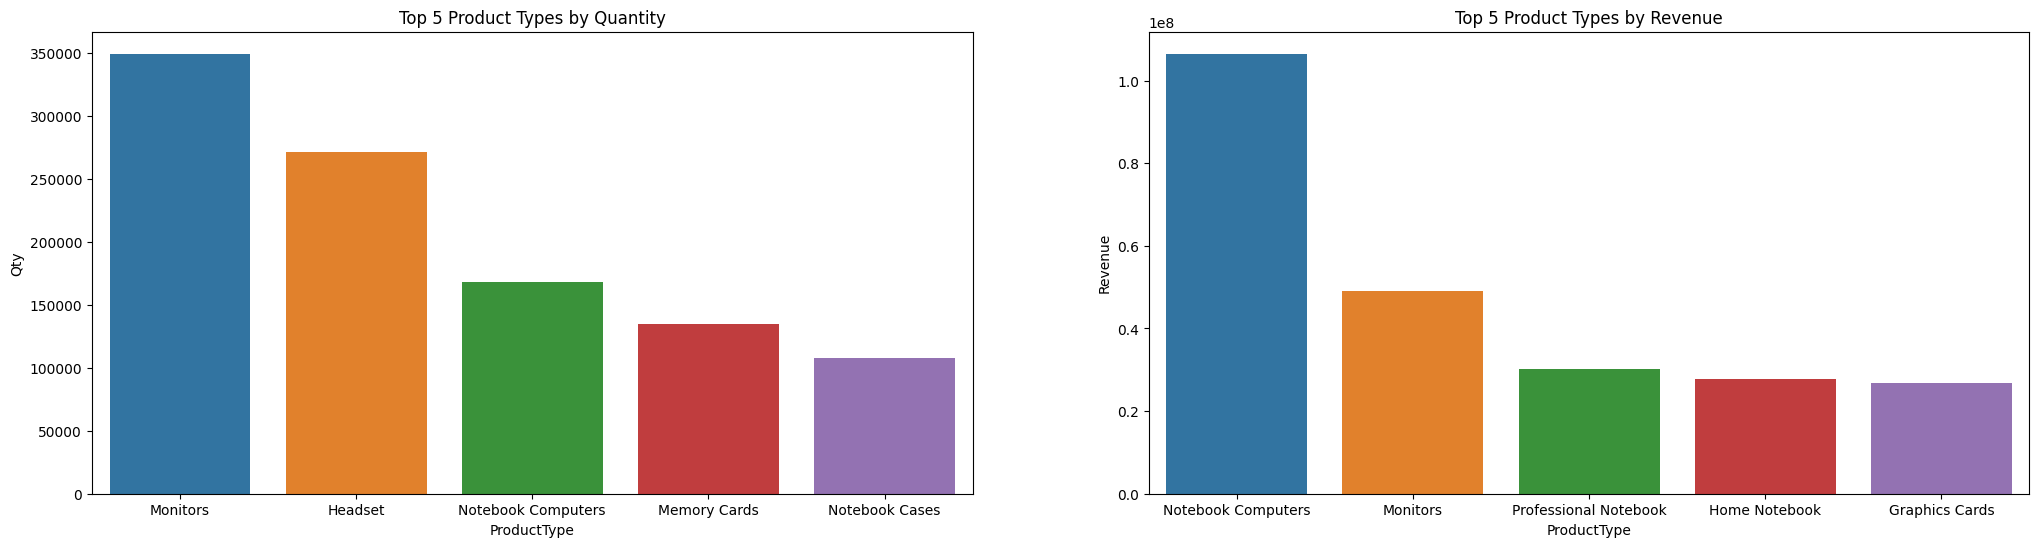

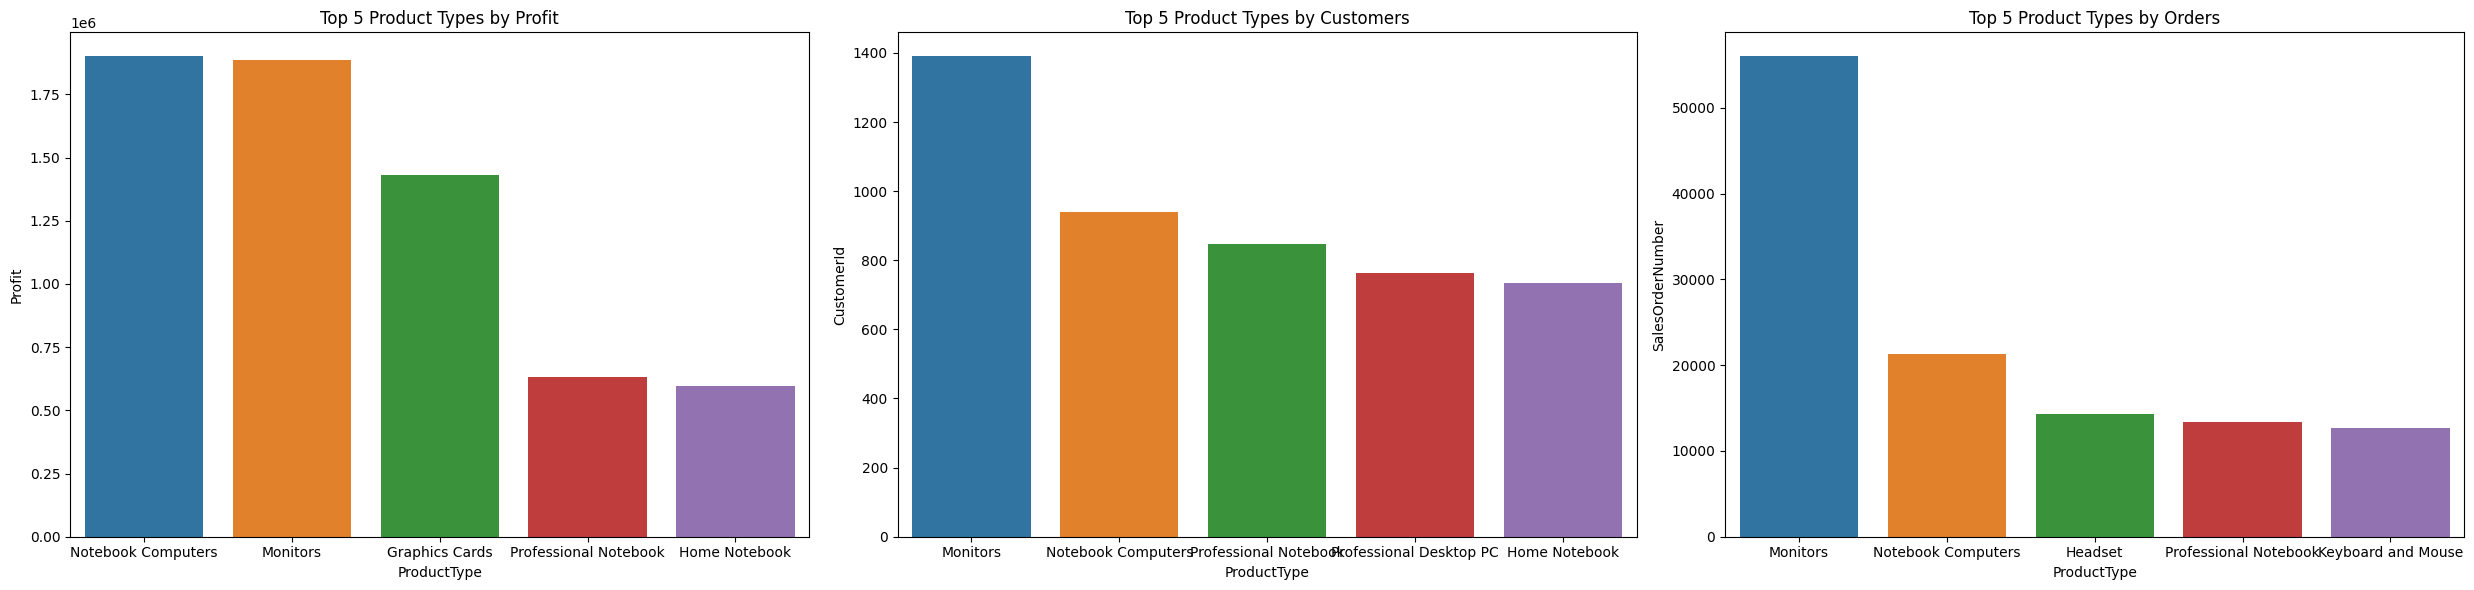

In [54]:
# Sort the data by each metric in descending order
top_qty = product_data.sort_values('Qty', ascending=False).head(5)
top_revenue = product_data.sort_values('Revenue', ascending=False).head(5)
top_profit = product_data.sort_values('Profit', ascending=False).head(5)
top_customers = product_data.sort_values('CustomerId', ascending=False).head(5)
top_orders = product_data.sort_values('SalesOrderNumber', ascending=False).head(5)

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 6))

#Plot the quantity data
sns.barplot(x=top_qty.index, y=top_qty['Qty'], ax=axs[0])
axs[0].set_title('Top 5 Product Types by Quantity')

#Plot the revenue data
sns.barplot(x=top_revenue.index, y=top_revenue['Revenue'], ax=axs[1])
axs[1].set_title('Top 5 Product Types by Revenue')

# Set up the subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

#Plot the profit data
sns.barplot(x=top_profit.index, y=top_profit['Profit'], ax=axs[0])
axs[0].set_title('Top 5 Product Types by Profit')

# Plot the customer data
sns.barplot(x=top_customers.index, y=top_customers['CustomerId'], ax=axs[1])
axs[1].set_title('Top 5 Product Types by Customers')

# Plot the order data
sns.barplot(x=top_orders.index, y=top_orders['SalesOrderNumber'], ax=axs[2])
axs[2].set_title('Top 5 Product Types by Orders')

# Display the subplots
plt.tight_layout()
plt.show()


In [55]:
popular_products = df.groupby(['year', 'ProductType'])['Revenue'].sum().reset_index()
popular_products = popular_products.sort_values(['Revenue'], ascending=[False])
popular_products = popular_products.groupby('year').head(1)
print(popular_products)

     year         ProductType       Revenue
210  2021  Notebook Computers  6.697623e+07
598  2022  Notebook Computers  3.485558e+07
868  2023       Home Notebook  8.346731e+06


In [56]:
least_popular = df.groupby(['year', 'ProductType'])['Revenue'].sum().reset_index()
least_popular = least_popular.sort_values(['Revenue'])
least_popular = least_popular.groupby('year').first()
print(least_popular)

                         ProductType       Revenue
year                                              
2021                     Video Games -10621.354337
2022  Home Audio & Video Accessories -10786.769601
2023         Multi Function Printers   -227.885497


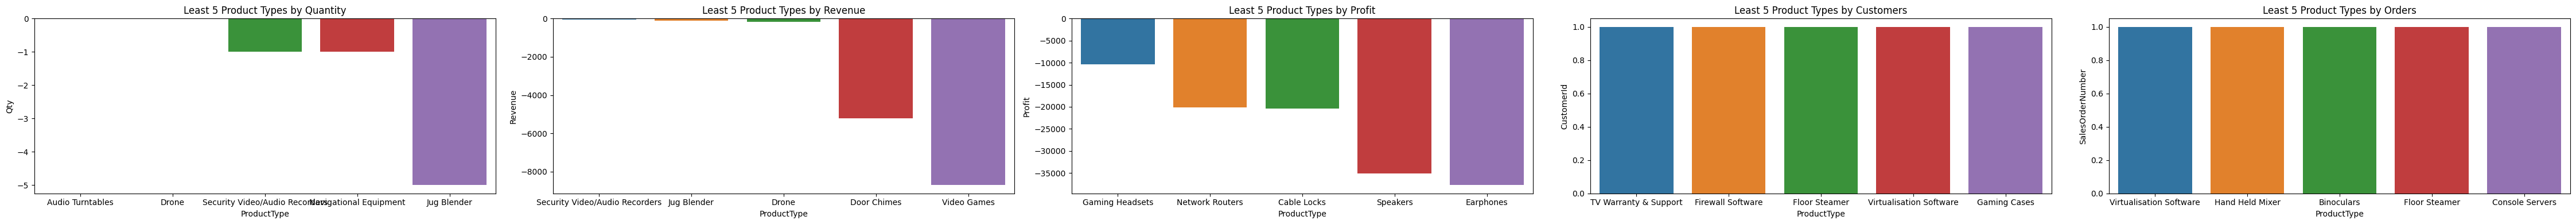

In [57]:
# Sort the data by each metric in ascending order
least_qty = product_data.sort_values('Qty', ascending=False).tail(5)
least_revenue = product_data.sort_values('Revenue', ascending=False).tail(5)
least_profit = product_data.sort_values('Profit', ascending=False).tail(5)
least_customers = product_data.sort_values('CustomerId', ascending=False).tail(5)
least_orders = product_data.sort_values('SalesOrderNumber', ascending=False).tail(5)

# Set up the subplots
fig, axs = plt.subplots(1, 5, figsize=(45, 4))

# Plot the quantity data
sns.barplot(x=least_qty.index, y=least_qty['Qty'], ax=axs[0])
axs[0].set_title('Least 5 Product Types by Quantity')

# Plot the revenue data
sns.barplot(x=least_revenue.index, y=least_revenue['Revenue'], ax=axs[1])
axs[1].set_title('Least 5 Product Types by Revenue')

# Plot the profit data
sns.barplot(x=least_profit.index, y=least_profit['Profit'], ax=axs[2])
axs[2].set_title('Least 5 Product Types by Profit')

# Plot the customer data
sns.barplot(x=least_customers.index, y=least_customers['CustomerId'], ax=axs[3])
axs[3].set_title('Least 5 Product Types by Customers')

# Plot the order data
sns.barplot(x=least_orders.index, y=least_orders['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('Least 5 Product Types by Orders')

# Display the subplots
plt.tight_layout()
plt.show()


### 9. Brand Insights
Popular and least popular brands with distributions with number of customers, orders, revenue, profit and quantity

In [58]:
# Group the data by brand and calculate the total quantity sold for each brand
brand_quantities = df.groupby('Brand')['Qty'].sum()

# Sort the brands by the total quantity sold in descending order
sorted_brands = brand_quantities.sort_values(ascending=False)

# Print the top 5 brands by total quantity sold
print("Top 5 brands by total quantity sold:")
print(sorted_brands.head(5))

# Print the least 5 brands by total quantity sold
print("\nLeast 5 brands by total quantity sold:")
print(sorted_brands.tail(5))

Top 5 brands by total quantity sold:
Brand
Lenovo      491606
Dell        383261
Poly        291579
Startech    238259
Epson       124240
Name: Qty, dtype: int64

Least 5 brands by total quantity sold:
Brand
Thrustmaster    -42
FREIGHT         -70
Arlo            -77
Rackmount IT   -142
Devolo         -686
Name: Qty, dtype: int64


In [59]:
# Group the data by brand and aggregate the relevant columns
brand_data = df.groupby('Brand').agg({'Qty': 'sum','Revenue': 'sum','Profit': 'sum','CustomerId': 'nunique','SalesOrderNumber': 'nunique'})

# Sort the data in descending order based on different columns
popular_brands_qty = brand_data.sort_values('Qty', ascending=False).index[0]
popular_brands_revenue = brand_data.sort_values('Revenue', ascending=False).index[0]
popular_brands_profit = brand_data.sort_values('Profit', ascending=False).index[0]
popular_brands_customers = brand_data.sort_values('CustomerId', ascending=False).index[0]
popular_brands_orders = brand_data.sort_values('SalesOrderNumber', ascending=False).index[0]

# Print the most popular brand based on different criteria
print(f"The most popular brand by quantity is: {popular_brands_qty}")
print(f"The most popular brand by revenue is: {popular_brands_revenue}")
print(f"The most popular brand by profit is: {popular_brands_profit}")
print(f"The most popular brand by number of customers is: {popular_brands_customers}")
print(f"The most popular brand by number of orders is: {popular_brands_orders}")


The most popular brand by quantity is: Lenovo
The most popular brand by revenue is: Lenovo
The most popular brand by profit is: Lenovo
The most popular brand by number of customers is: Dell
The most popular brand by number of orders is: Dell


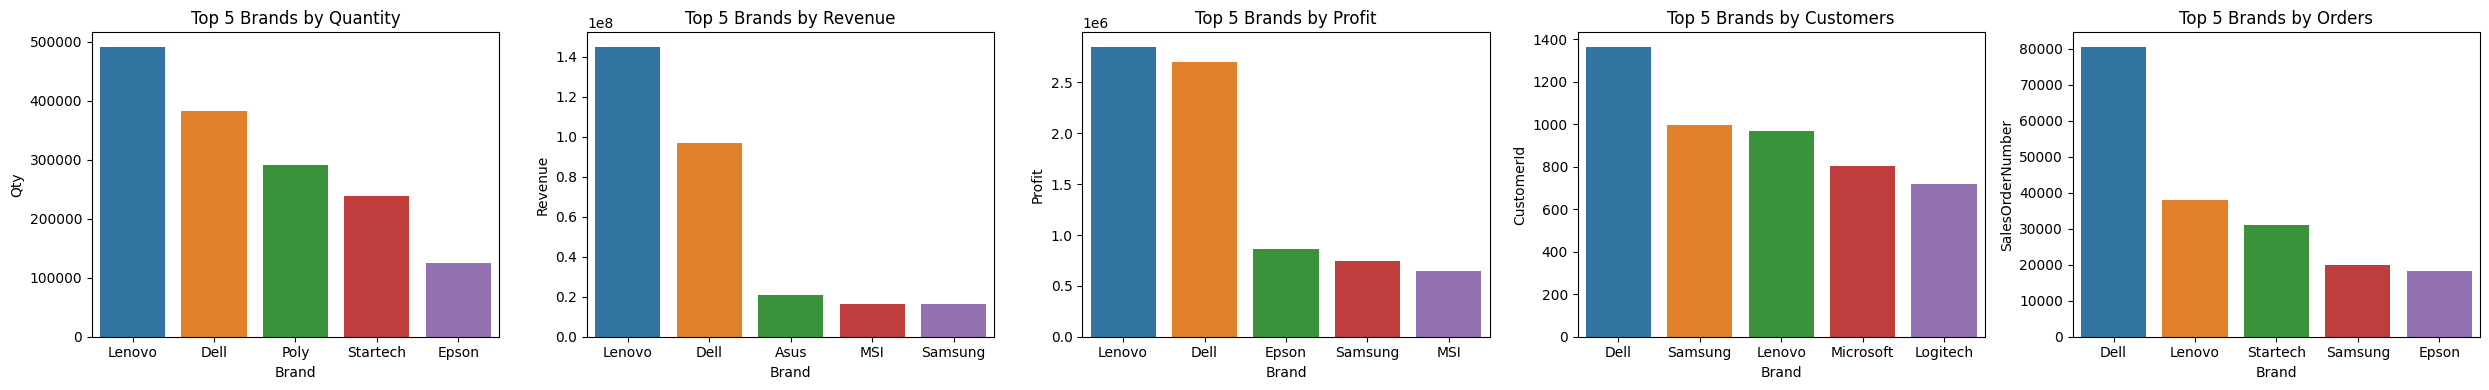

In [60]:
# Sort the data by each metric in descending order
top_qty = brand_data.sort_values('Qty', ascending=False).head(5)
top_revenue = brand_data.sort_values('Revenue', ascending=False).head(5)
top_profit = brand_data.sort_values('Profit', ascending=False).head(5)
top_customers = brand_data.sort_values('CustomerId', ascending=False).head(5)
top_orders = brand_data.sort_values('SalesOrderNumber', ascending=False).head(5)

# Set up the subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 4))

# Plot the quantity data
sns.barplot(x=top_qty.index, y=top_qty['Qty'], ax=axs[0])
axs[0].set_title('Top 5 Brands by Quantity')

# Plot the revenue data
sns.barplot(x=top_revenue.index, y=top_revenue['Revenue'], ax=axs[1])
axs[1].set_title('Top 5 Brands by Revenue')

# Plot the profit data
sns.barplot(x=top_profit.index, y=top_profit['Profit'], ax=axs[2])
axs[2].set_title('Top 5 Brands by Profit')

# Plot the customer data
sns.barplot(x=top_customers.index, y=top_customers['CustomerId'], ax=axs[3])
axs[3].set_title('Top 5 Brands by Customers')

# Plot the order data
sns.barplot(x=top_orders.index, y=top_orders['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('Top 5 Brands by Orders')

# Display the subplots
plt.tight_layout()
plt.show()

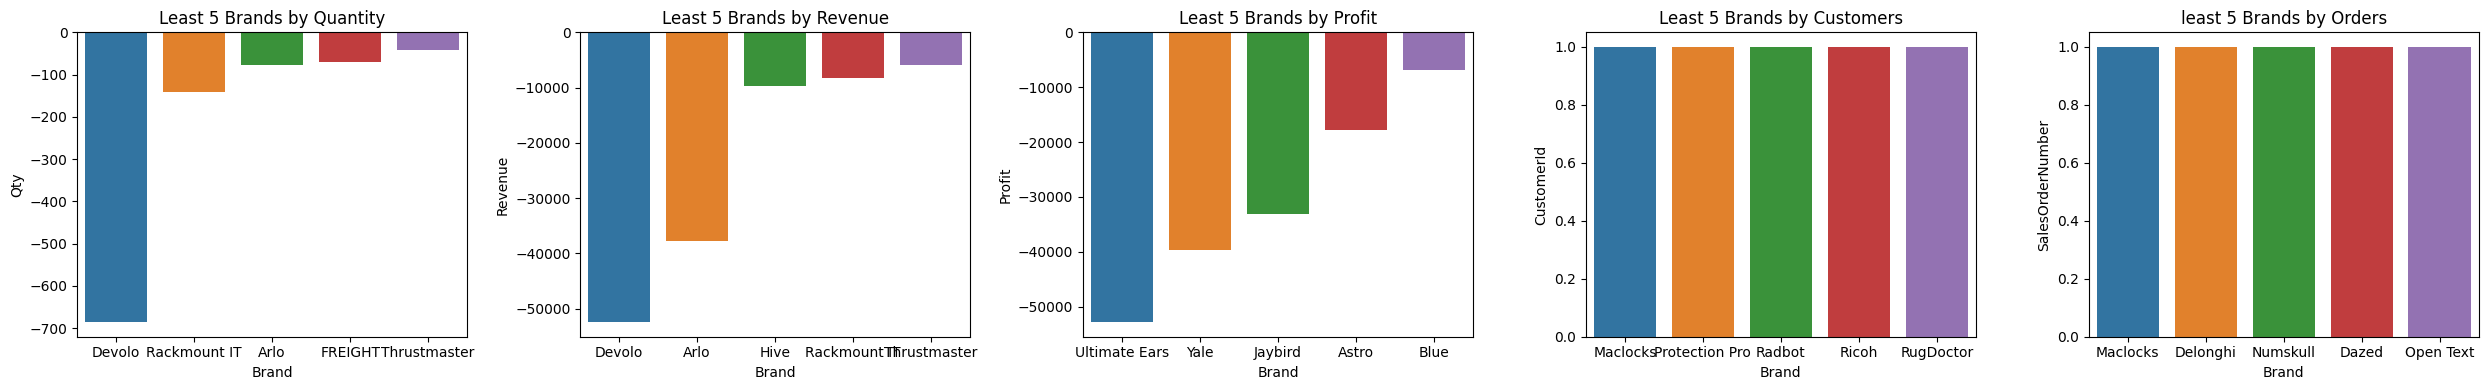

In [61]:
# Sort the data in ascending order based on different columns to get the least popular brands
least_popular_brands_qty = brand_data.sort_values('Qty', ascending=True).head(5)
least_popular_brands_revenue = brand_data.sort_values('Revenue', ascending=True).head(5)
least_popular_brands_profit = brand_data.sort_values('Profit', ascending=True).head(5)
least_popular_brands_customers = brand_data.sort_values('CustomerId', ascending=True).head(5)
least_popular_brands_orders = brand_data.sort_values('SalesOrderNumber', ascending=True).head(5)

# Set up the subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 4))

# Plot the quantity data
sns.barplot(x=least_popular_brands_qty.index, y=least_popular_brands_qty['Qty'], ax=axs[0])
axs[0].set_title('Least 5 Brands by Quantity')

# Plot the revenue data
sns.barplot(x=least_popular_brands_revenue.index, y=least_popular_brands_revenue['Revenue'], ax=axs[1])
axs[1].set_title('Least 5 Brands by Revenue')

# Plot the profit data
sns.barplot(x=least_popular_brands_profit.index, y=least_popular_brands_profit['Profit'], ax=axs[2])
axs[2].set_title('Least 5 Brands by Profit')

# Plot the customer data
sns.barplot(x=least_popular_brands_customers.index, y=least_popular_brands_customers['CustomerId'], ax=axs[3])
axs[3].set_title('Least 5 Brands by Customers')

# Plot the order data
sns.barplot(x=least_popular_brands_orders.index, y=least_popular_brands_orders['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('least 5 Brands by Orders')

# Display the subplots
plt.tight_layout()
plt.show()


<ipython-input-62-881abaa3eff9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand_qty_profit = df.groupby('Brand')['Qty', 'Profit'].sum()


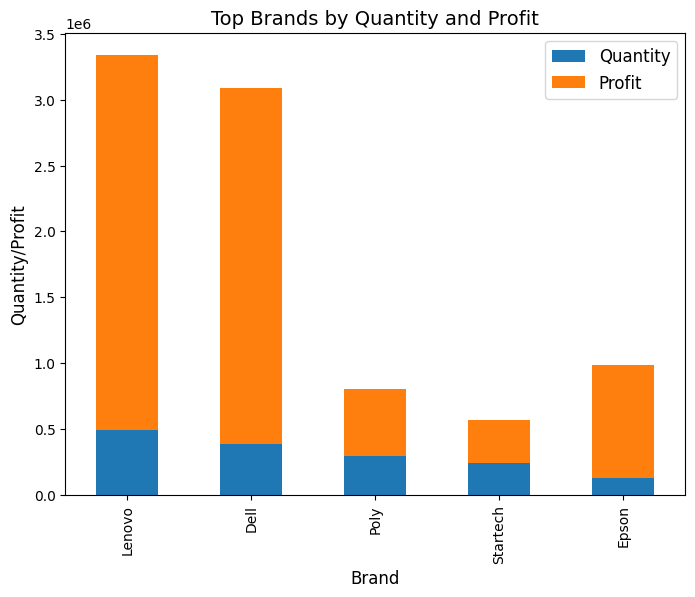

In [62]:
#Group the data by brand and calculate the sum of quantity and profit for each brand
brand_qty_profit = df.groupby('Brand')['Qty', 'Profit'].sum()

# Sort the brands by the total quantity in descending order
brand_qty_profit = brand_qty_profit.sort_values(by='Qty', ascending=False)

# Get the top 5 brands by quantity
top_brands_qty = brand_qty_profit.index[:5]

# Subset the data for the top 5 brands by quantity
top_brands_qty_profit = brand_qty_profit.loc[top_brands_qty]

# Create a stacked bar chart
ax = top_brands_qty_profit.plot(kind='bar', stacked=True, figsize=(8,6))

# Set the title and axis labels
ax.set_title('Top Brands by Quantity and Profit', fontsize=14)
ax.set_xlabel('Brand', fontsize=12)
ax.set_ylabel('Quantity/Profit', fontsize=12)

# Add a legend
ax.legend(['Quantity', 'Profit'], fontsize=12)

# Show the plot
plt.show()

<ipython-input-63-0b18c560e707>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand_rev_profit = df.groupby('Brand')['Revenue', 'Profit'].sum()


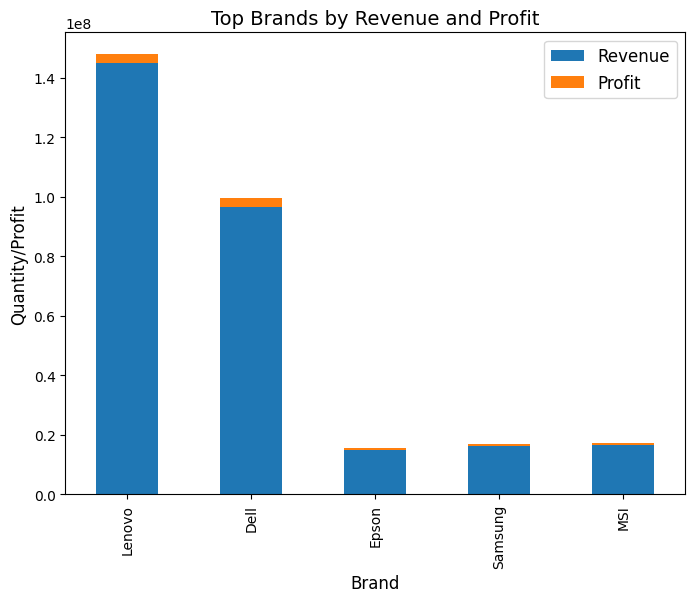

In [63]:
#Group the data by brand and calculate the sum of quantity and profit for each brand
brand_rev_profit = df.groupby('Brand')['Revenue', 'Profit'].sum()

# Sort the brands by the total quantity in descending order
brand_rev_profit = brand_rev_profit.sort_values(by='Profit', ascending=False)

# Get the top 5 brands by quantity
top_brands_rev = brand_rev_profit.index[:5]

# Subset the data for the top 5 brands by quantity
top_brands_rev_profit = brand_rev_profit.loc[top_brands_rev]

# Create a stacked bar chart
ax = top_brands_rev_profit.plot(kind='bar', stacked=True, figsize=(8,6))

# Set the title and axis labels
ax.set_title('Top Brands by Revenue and Profit', fontsize=14)
ax.set_xlabel('Brand', fontsize=12)
ax.set_ylabel('Quantity/Profit', fontsize=12)

# Add a legend
ax.legend(['Revenue', 'Profit'], fontsize=12)

# Show the plot
plt.show()

In [64]:
# Group the data by brand and calculate the sum of quantity, revenue and profit for each brand
brand_rev_profit = df.groupby('Brand')['Revenue', 'Profit'].sum()

# Sort the brands by the total profit in descending order
brand_rev_profit = brand_rev_profit.sort_values(by='Profit', ascending=False)

# Get the top 5 brands by profit
top_brands_profit = brand_rev_profit.index[:5]

# Subset the data for the top 5 brands by profit
top_brands_rev_profit = brand_rev_profit.loc[top_brands_profit]

# Calculate the total revenue and profit
total_rev = brand_rev_profit['Revenue'].sum()
total_profit = brand_rev_profit['Profit'].sum()

# Calculate the percentage of revenue and profit for each top brand
top_brands_rev_profit['Revenue_Pct'] = (top_brands_rev_profit['Revenue'] / total_rev) * 100
top_brands_rev_profit['Profit_Pct'] = (top_brands_rev_profit['Profit'] / total_profit) * 100

# Print the top brands by revenue and their percentage of revenue and profit
print("Top brands by revenue:")
print(top_brands_rev_profit[['Revenue', 'Revenue_Pct', 'Profit_Pct']])

# Sort the brands by the total revenue in descending order
brand_rev_profit = brand_rev_profit.sort_values(by='Revenue', ascending=False)

# Get the top 5 brands by revenue
top_brands_rev = brand_rev_profit.index[:5]

# Subset the data for the top 5 brands by revenue
top_brands_rev_profit = brand_rev_profit.loc[top_brands_rev]

# Calculate the percentage of revenue and profit for each top brand
top_brands_rev_profit['Revenue_Pct'] = (top_brands_rev_profit['Revenue'] / total_rev) * 100
top_brands_rev_profit['Profit_Pct'] = (top_brands_rev_profit['Profit'] / total_profit) * 100

# Print the top brands by profit and their percentage of revenue and profit
print("Top brands by profit:")
print(top_brands_rev_profit[['Revenue_Pct', 'Profit_Pct']])


Top brands by revenue:
              Revenue  Revenue_Pct  Profit_Pct
Brand                                         
Lenovo   1.450462e+08    31.116564   17.815511
Dell     9.673756e+07    20.752975   16.909892
Epson    1.484249e+07     3.184139    5.363688
Samsung  1.632030e+07     3.501170    4.660719
MSI      1.653613e+07     3.547473    4.060610
Top brands by profit:
         Revenue_Pct  Profit_Pct
Brand                           
Lenovo     31.116564   17.815511
Dell       20.752975   16.909892
Asus        4.461233    3.882996
MSI         3.547473    4.060610
Samsung     3.501170    4.660719


<ipython-input-64-0cbf56fa7bcc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand_rev_profit = df.groupby('Brand')['Revenue', 'Profit'].sum()


In [65]:
# Group the data by year and brand, and calculate the sum of revenue for each group
yearly_brand_revenue = df.groupby(['year', 'Brand'])['Revenue'].sum().reset_index()

# Sort the groups by revenue in descending order
yearly_brand_revenue = yearly_brand_revenue.sort_values(by=['Revenue'], ascending=[False])

# Get the top 3 brands for each year
top_brands_by_year = yearly_brand_revenue.groupby('year').head(1)

print(top_brands_by_year)


     year   Brand       Revenue
137  2021  Lenovo  7.085155e+07
422  2022  Lenovo  5.940310e+07
649  2023  Lenovo  1.479157e+07


In [66]:
# Group the data by year and brand, and calculate the total revenue for each group
yearly_brand_revenue = df.groupby(['year', 'Brand'])['Revenue'].sum()

# Sort the data by year and revenue in ascending order
yearly_brand_revenue = yearly_brand_revenue.reset_index().sort_values(['Revenue'])

# Select the first row for each year, which will give you the least popular brand for that year
least_popular_brands = yearly_brand_revenue.groupby('year').first()
print(least_popular_brands)

             Brand       Revenue
year                            
2021          Hive -16382.015909
2022        Devolo -53449.880879
2023  Rackmount IT  -9017.510536


### 10. Sales team Insights


Which sales team generates the most revenue, profit, customers and orders?

In [67]:
# group the data by sales team title and calculate the total revenue and profit
grouped = df.groupby('SalesTeamName').agg({'Revenue': 'sum', 'Profit': 'sum'})

# sort the data in descending order based on revenue and profit
sorted_data_by_revenue = grouped.sort_values(by='Revenue', ascending=False)
sorted_data_by_profit = grouped.sort_values(by='Profit', ascending=False)

# get the top sales team(s) with the highest revenue and profit
top_sales_team_by_revenue = sorted_data_by_revenue.head(1)
top_sales_team_by_profit = sorted_data_by_profit.head(1)

print('Top sales team by revenue:')
print(top_sales_team_by_revenue)

print('\nTop sales team by profit:')
print(top_sales_team_by_profit)

Top sales team by revenue:
                      Revenue        Profit
SalesTeamName                              
Corporate South  1.854236e+08  4.260029e+06

Top sales team by profit:
                       Revenue        Profit
SalesTeamName                               
Components North  9.126559e+07  4.439110e+06


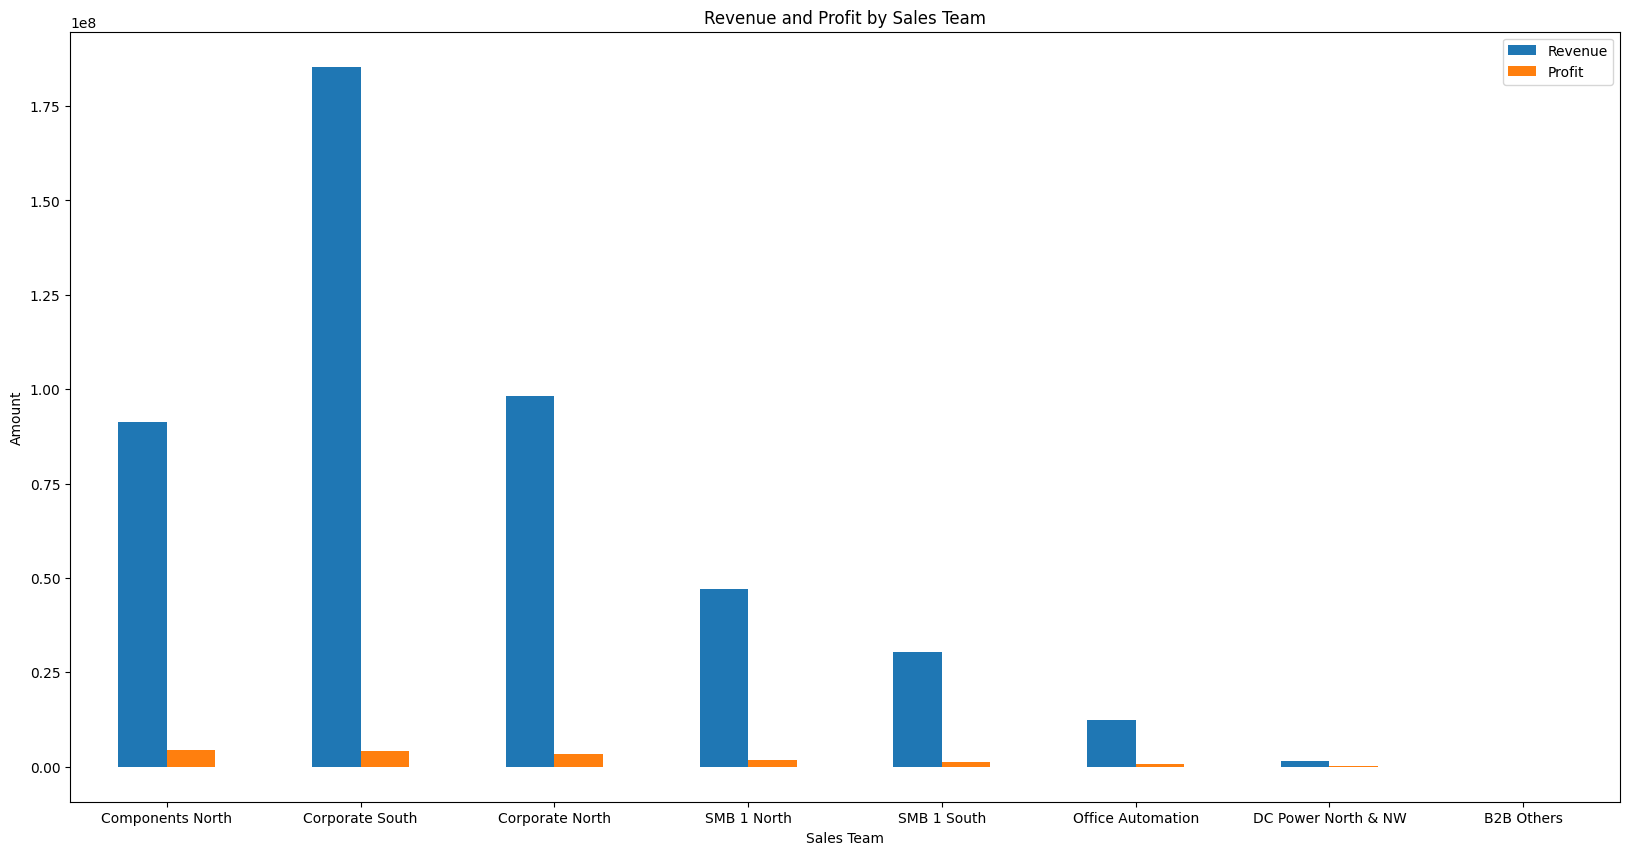

In [68]:
# create a bar chart for the revenue and profit for each sales team
sorted_data_by_profit.plot(kind='bar', rot=0, figsize = (20,10))

# set the title and labels for the chart
plt.title('Revenue and Profit by Sales Team')
plt.xlabel('Sales Team')
plt.ylabel('Amount')

# show the chart
plt.show()

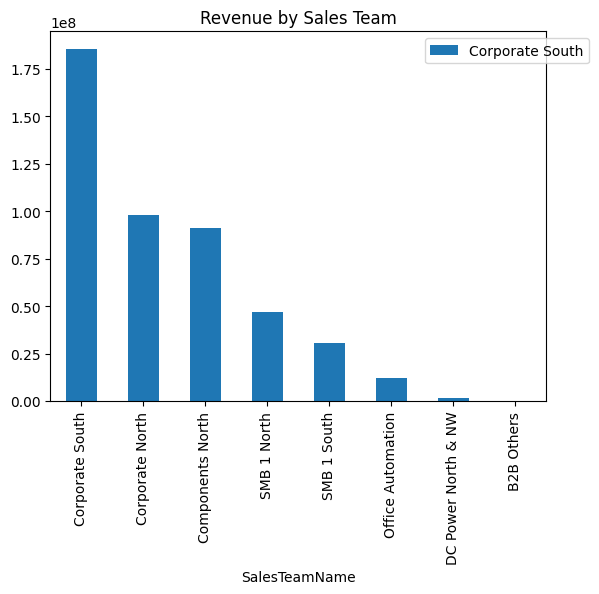

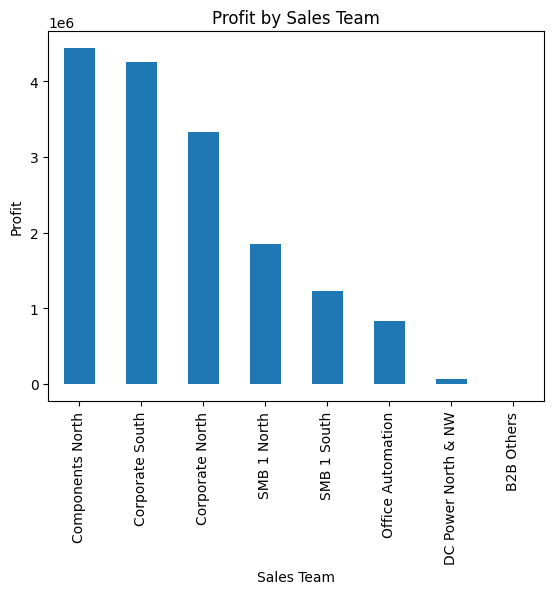

In [69]:
# create a pie chart for the revenue for each sales team
sorted_data_by_revenue['Revenue'].plot(kind='bar')

# set the title and labels for the chart
plt.title('Revenue by Sales Team')
plt.legend(labels=sorted_data_by_revenue.index, bbox_to_anchor=(1.1, 1))

# show the chart
plt.show()

# create a pie chart for the profit for each sales team
sorted_data_by_profit['Profit'].plot(kind='bar')

# set the title and labels for the chart
plt.title('Profit by Sales Team')
plt.xlabel('Sales Team')
plt.ylabel('Profit')

# show the chart
plt.show()

In [70]:
# Group the data by team and calculate the sum of revenue and profit for each team
team_rev_profit = df.groupby('SalesTeamName')['Revenue', 'Profit'].sum()

# Calculate the total revenue and profit for all teams
total_rev_profit = team_rev_profit.sum()

# Calculate the percentage of revenue and profit for each team
team_rev_profit_pct = (team_rev_profit / total_rev_profit) * 100

# Print out the team name along with their percentage of profit and revenue
for team in team_rev_profit_pct.index:
    print(f"Sales Team {team}:")
    print(f"Revenue: {team_rev_profit_pct.loc[team]['Revenue']:.2f}%")
    print(f"Profit: {team_rev_profit_pct.loc[team]['Profit']:.2f}%")
    print("\n")


Sales Team B2B Others:
Revenue: 0.00%
Profit: -0.02%


Sales Team Components North:
Revenue: 19.58%
Profit: 27.75%


Sales Team Corporate North:
Revenue: 21.06%
Profit: 20.81%


Sales Team Corporate South:
Revenue: 39.78%
Profit: 26.63%


Sales Team DC Power North & NW:
Revenue: 0.33%
Profit: 0.41%


Sales Team Office Automation:
Revenue: 2.64%
Profit: 5.21%


Sales Team SMB 1 North:
Revenue: 10.08%
Profit: 11.54%


Sales Team SMB 1 South:
Revenue: 6.52%
Profit: 7.68%




<ipython-input-70-837f7b9b7eaa>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_rev_profit = df.groupby('SalesTeamName')['Revenue', 'Profit'].sum()


### 11.Freight cost analysis

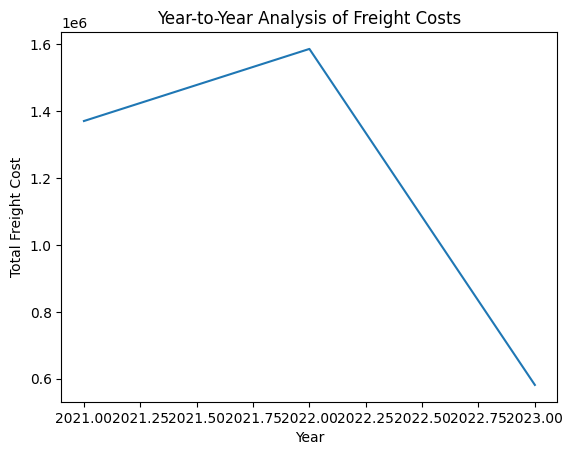

In [71]:
# Group by year and calculate total freight cost
freight_cost = df.groupby('year')['Freight cost'].sum()

# Plot the results
plt.plot(freight_cost.index, freight_cost.values)
plt.xlabel('Year')
plt.ylabel('Total Freight Cost')
plt.title('Year-to-Year Analysis of Freight Costs')
plt.show()

In [72]:
df.head()

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName,year
0,100002803,2913843,10,2021-02-04,2,Microsoft,Operating System Software,1000477.0,254.213783,1.271048,0.0,Components North,2021
1,100003323,2918083,50,2021-02-04,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North,2021
2,100016168,2916878,20,2021-02-04,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North,2021
3,100001590,2470475,10,2021-02-04,10,Lenovo,Notebook Computers,1000133.0,21362.979640,133.944138,0.0,Corporate South,2021
4,100001590,2544987,10,2021-02-04,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South,2021


### 12. Monthly Analysis

How has the customers, revenue, , orders and quantity changed over time?

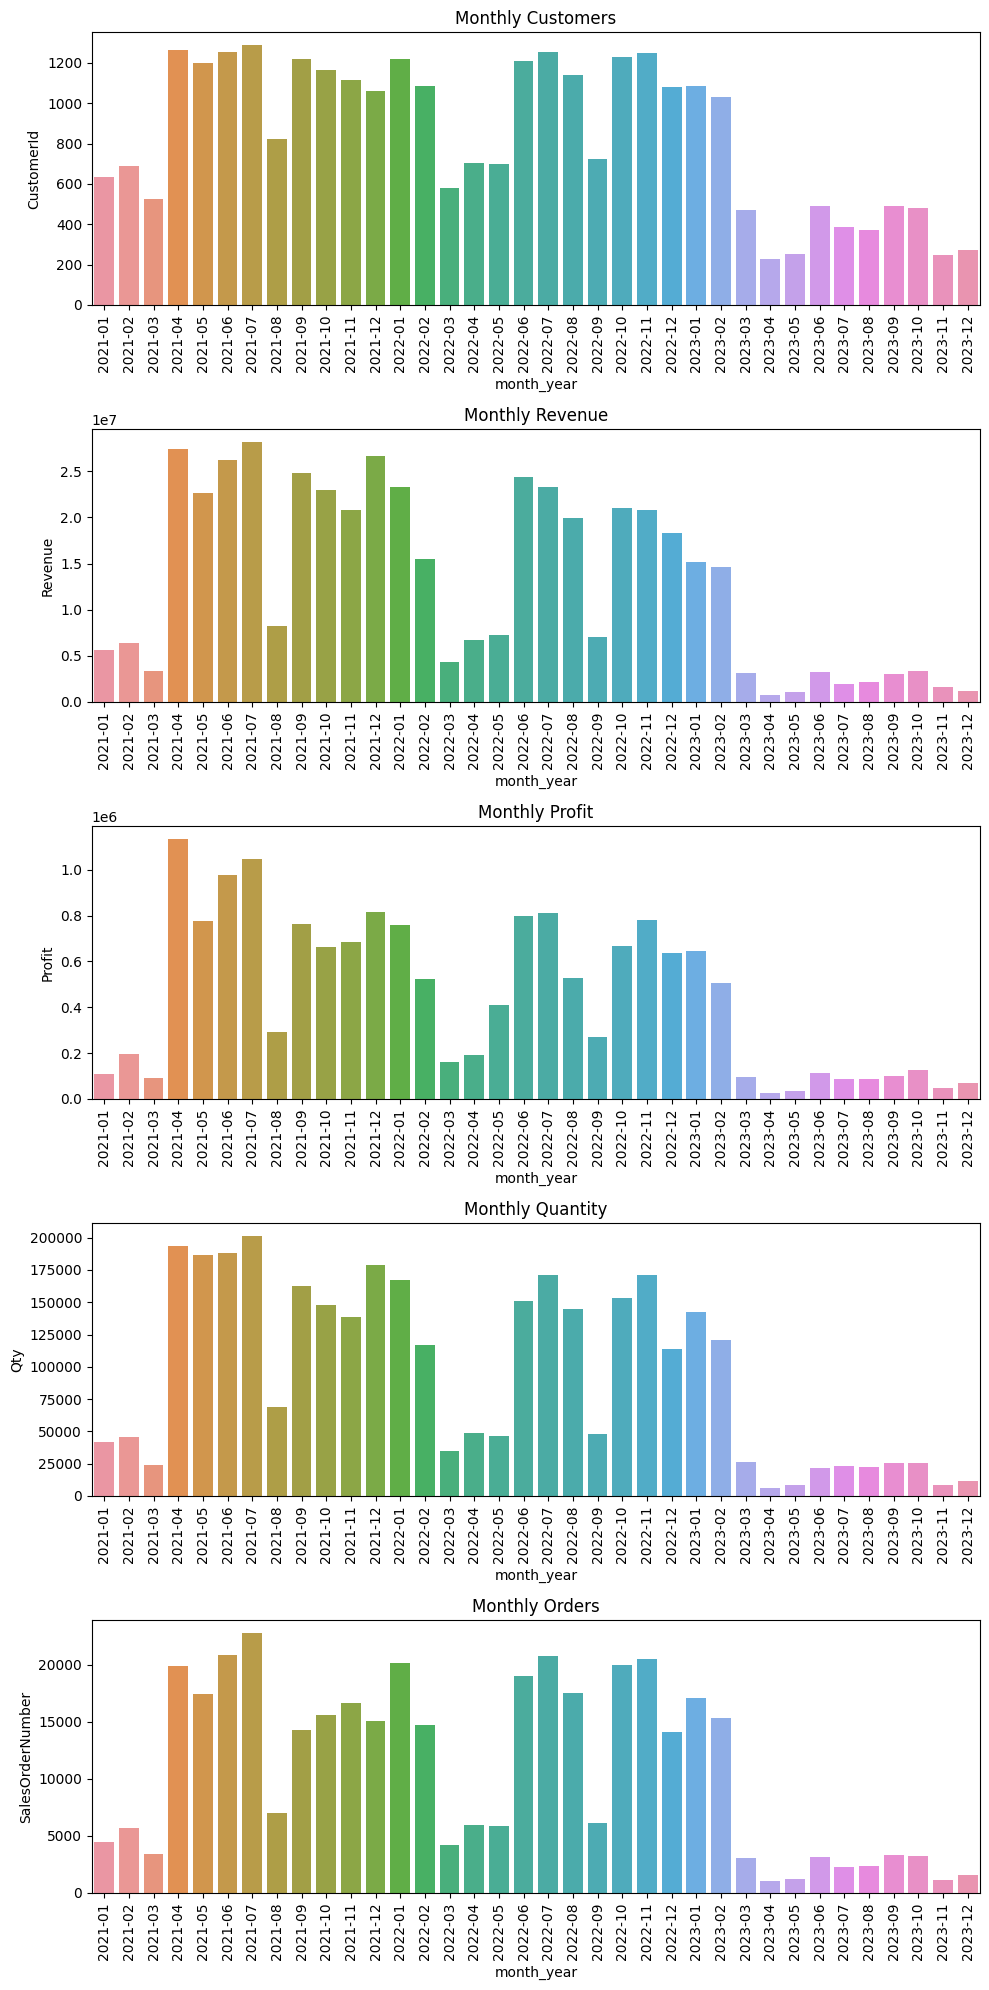

In [73]:
# Group the data by month_year and calculate the sum for the selected metrics
df['month_year'] = pd.to_datetime(df['ShipDate']).dt.to_period('M')

monthly_data = df.groupby('month_year').agg({'CustomerId': 'nunique',
                                                     'Revenue': 'sum',
                                                     'Profit': 'sum',
                                                     'Qty': 'sum',
                                                     'SalesOrderNumber': 'nunique'})

# Create a bar plot for each metric
fig, axs = plt.subplots(5,1, figsize=(10,20))

sns.barplot(x=monthly_data.index, y=monthly_data['CustomerId'], ax=axs[0])
axs[0].set_title('Monthly Customers')

sns.barplot(x=monthly_data.index, y=monthly_data['Revenue'], ax=axs[1])
axs[1].set_title('Monthly Revenue')

sns.barplot(x=monthly_data.index, y=monthly_data['Profit'], ax=axs[2])
axs[2].set_title('Monthly Profit')

sns.barplot(x=monthly_data.index, y=monthly_data['Qty'], ax=axs[3])
axs[3].set_title('Monthly Quantity')

sns.barplot(x=monthly_data.index, y=monthly_data['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('Monthly Orders')

# Rotate the x-axis labels
for ax in axs:
    ax.tick_params(axis='x', rotation=90)

# Adjust the subplot layout and show the plot
plt.tight_layout()
plt.show()


In [74]:
# Convert ShipDate column to datetime type
df['ShipDate'] = pd.to_datetime(df['ShipDate'])

# Create a new column month_year
df['month_year'] = df['ShipDate'].dt.strftime('%Y-%m')

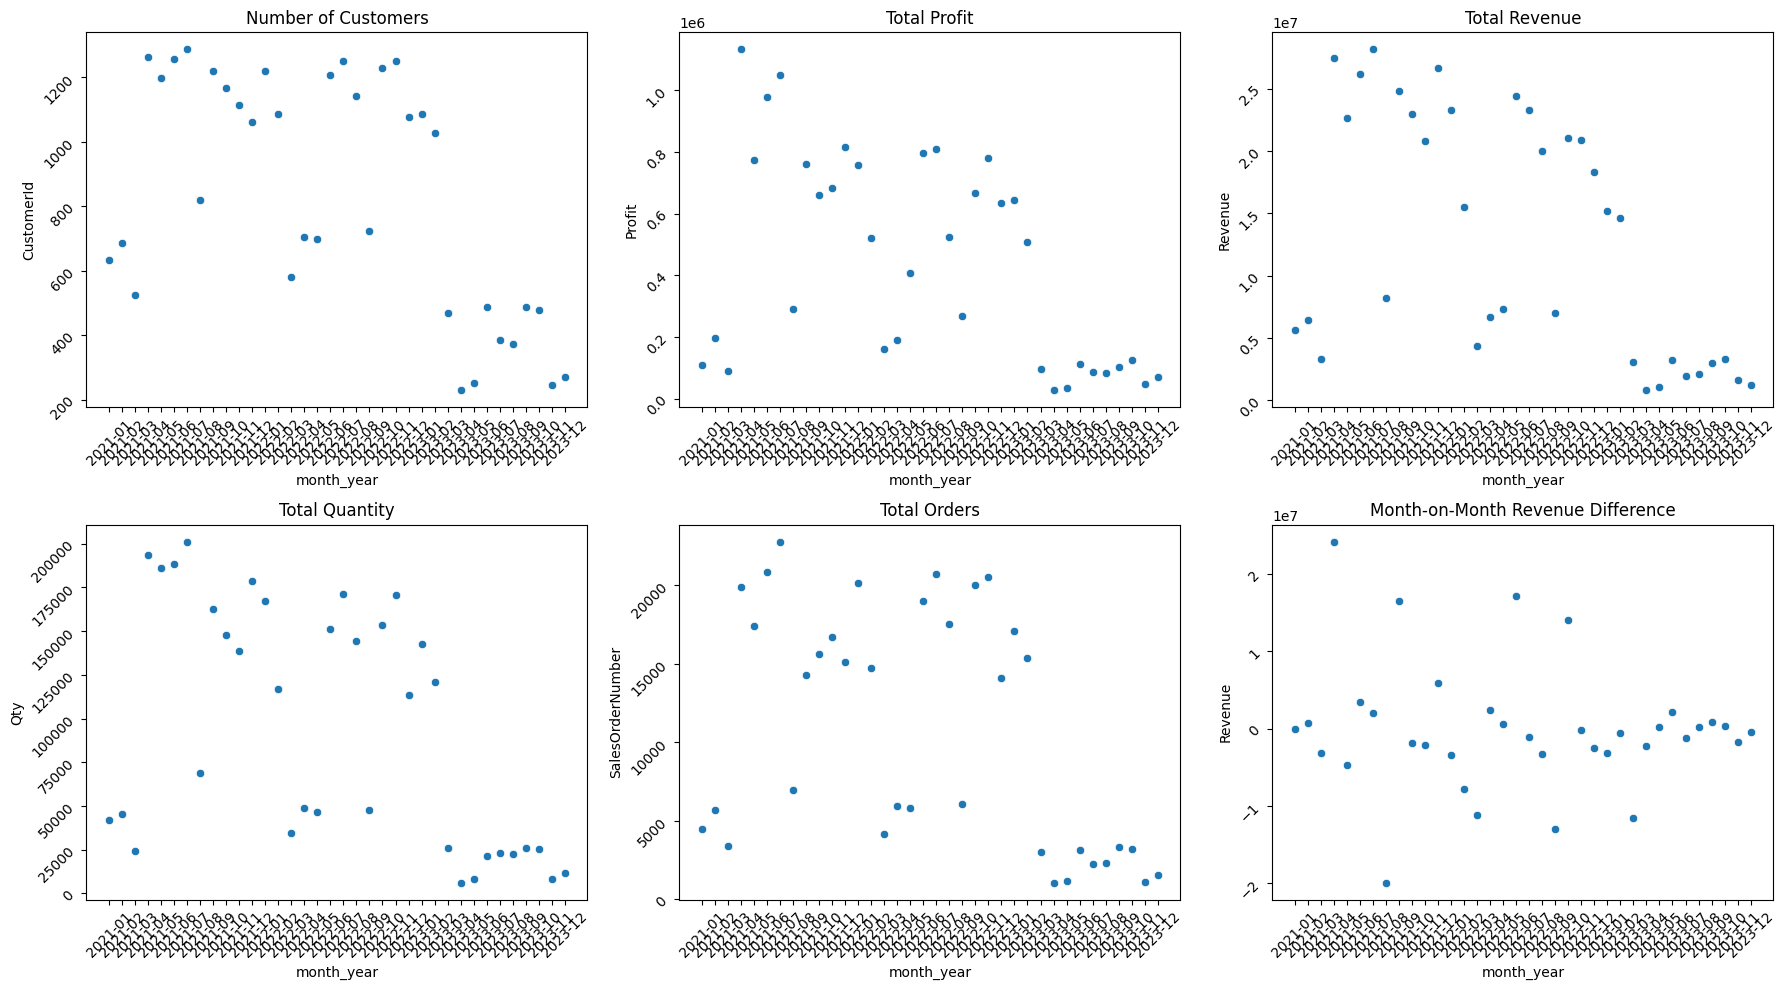

In [75]:
# Group the data by month_year and aggregate the columns
monthly_data = df.groupby('month_year').agg({'CustomerId': 'nunique',
                                             'Profit': 'sum',
                                             'Revenue': 'sum',
                                             'Qty': 'sum',
                                             'SalesOrderNumber': 'nunique'})

# Compute month-on-month differences
monthly_data_diff = monthly_data.diff().fillna(0)

# Create scatter plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(x=monthly_data.index, y=monthly_data['CustomerId'], ax=axs[0, 0])
axs[0, 0].set_title('Number of Customers')

sns.scatterplot(x=monthly_data.index, y=monthly_data['Profit'], ax=axs[0, 1])
axs[0, 1].set_title('Total Profit')

sns.scatterplot(x=monthly_data.index, y=monthly_data['Revenue'], ax=axs[0, 2])
axs[0, 2].set_title('Total Revenue')

sns.scatterplot(x=monthly_data.index, y=monthly_data['Qty'], ax=axs[1, 0])
axs[1, 0].set_title('Total Quantity')

sns.scatterplot(x=monthly_data.index, y=monthly_data['SalesOrderNumber'], ax=axs[1, 1])
axs[1, 1].set_title('Total Orders')

sns.scatterplot(x=monthly_data_diff.index, y=monthly_data_diff['Revenue'], ax=axs[1, 2])
axs[1, 2].set_title('Month-on-Month Revenue Difference')

# Rotate x-axis labels for better visibility
for ax in axs.flat:
    ax.tick_params(labelrotation=45)

# Display the subplots
plt.tight_layout()
plt.show()


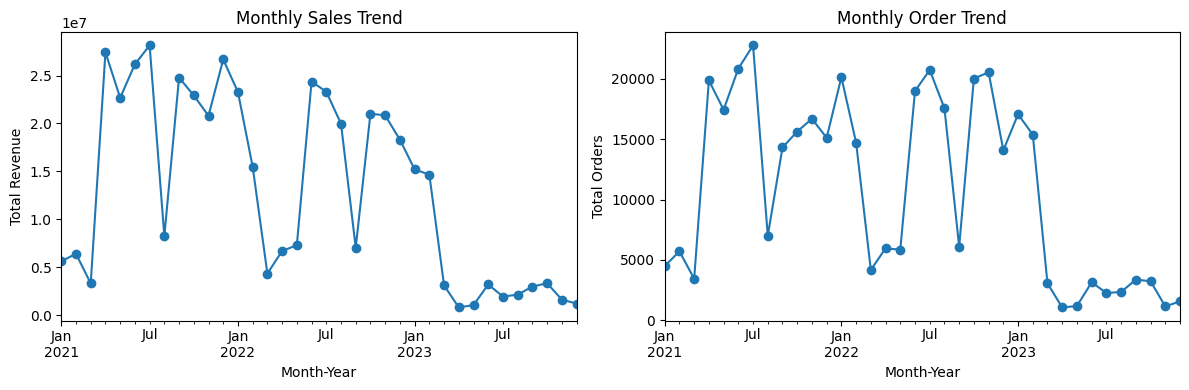

In [76]:
df['month_year'] = pd.to_datetime(df['ShipDate']).dt.to_period('M')

# Calculate the totals for each month and metric
monthly_totals = df.groupby('month_year').agg({
    'Revenue': 'sum',
    'SalesOrderNumber': 'nunique'
})

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the monthly sales trend
monthly_totals['Revenue'].plot(ax=axs[0], marker='o')
axs[0].set_xlabel('Month-Year')
axs[0].set_ylabel('Total Revenue')
axs[0].set_title('Monthly Sales Trend')

# Plot the monthly order trend
monthly_totals['SalesOrderNumber'].plot(ax=axs[1], marker='o')
axs[1].set_xlabel('Month-Year')
axs[1].set_ylabel('Total Orders')
axs[1].set_title('Monthly Order Trend')

# Display the subplots
plt.tight_layout()
plt.show()

### 13.Quaterly Analysis

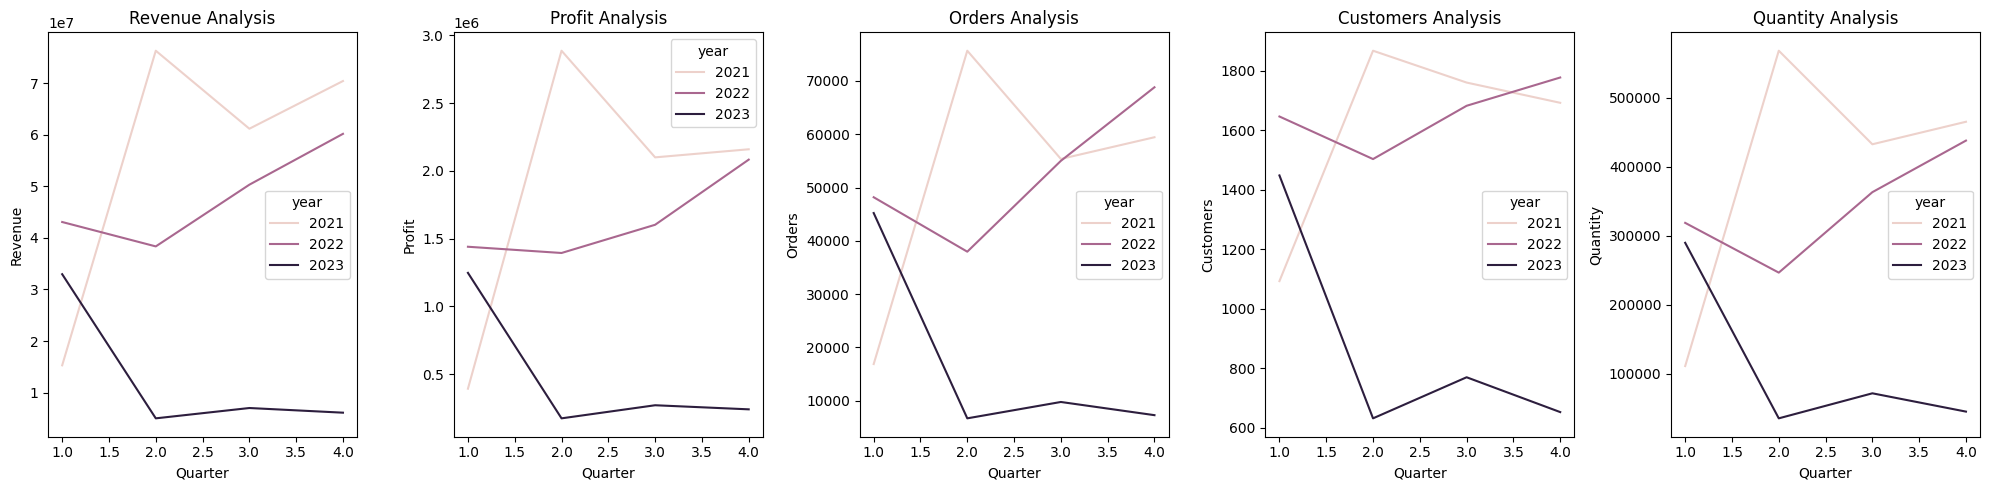

In [77]:
# Assuming the 'ShipDate' column is named 'ShipDate'
df['Quarter'] = df['ShipDate'].dt.quarter

# Group by 'Year' and 'Quarter' columns and calculate the desired metrics
quarterly_analysis = df.groupby(['year', 'Quarter']).agg({'Revenue': 'sum', 'Profit': 'sum', 'SalesOrderNumber': 'count', 'CustomerId': 'nunique', 'Qty': 'sum'})


# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

# Plot revenue analysis
sns.lineplot(x='Quarter', y='Revenue', hue='year', data=quarterly_analysis, ax=axes[0])
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Revenue')
axes[0].set_title('Revenue Analysis')

# Plot profit analysis
sns.lineplot(x='Quarter', y='Profit', hue='year', data=quarterly_analysis, ax=axes[1])
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Profit')
axes[1].set_title('Profit Analysis')

# Plot orders analysis
sns.lineplot(x='Quarter', y='SalesOrderNumber', hue='year', data=quarterly_analysis, ax=axes[2])
axes[2].set_xlabel('Quarter')
axes[2].set_ylabel('Orders')
axes[2].set_title('Orders Analysis')

# Plot customers analysis
sns.lineplot(x='Quarter', y='CustomerId', hue='year', data=quarterly_analysis, ax=axes[3])
axes[3].set_xlabel('Quarter')
axes[3].set_ylabel('Customers')
axes[3].set_title('Customers Analysis')

# Plot quantity analysis
sns.lineplot(x='Quarter', y='Qty', hue='year', data=quarterly_analysis, ax=axes[4])
axes[4].set_xlabel('Quarter')
axes[4].set_ylabel('Quantity')
axes[4].set_title('Quantity Analysis')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### 14. Yearly Analysis

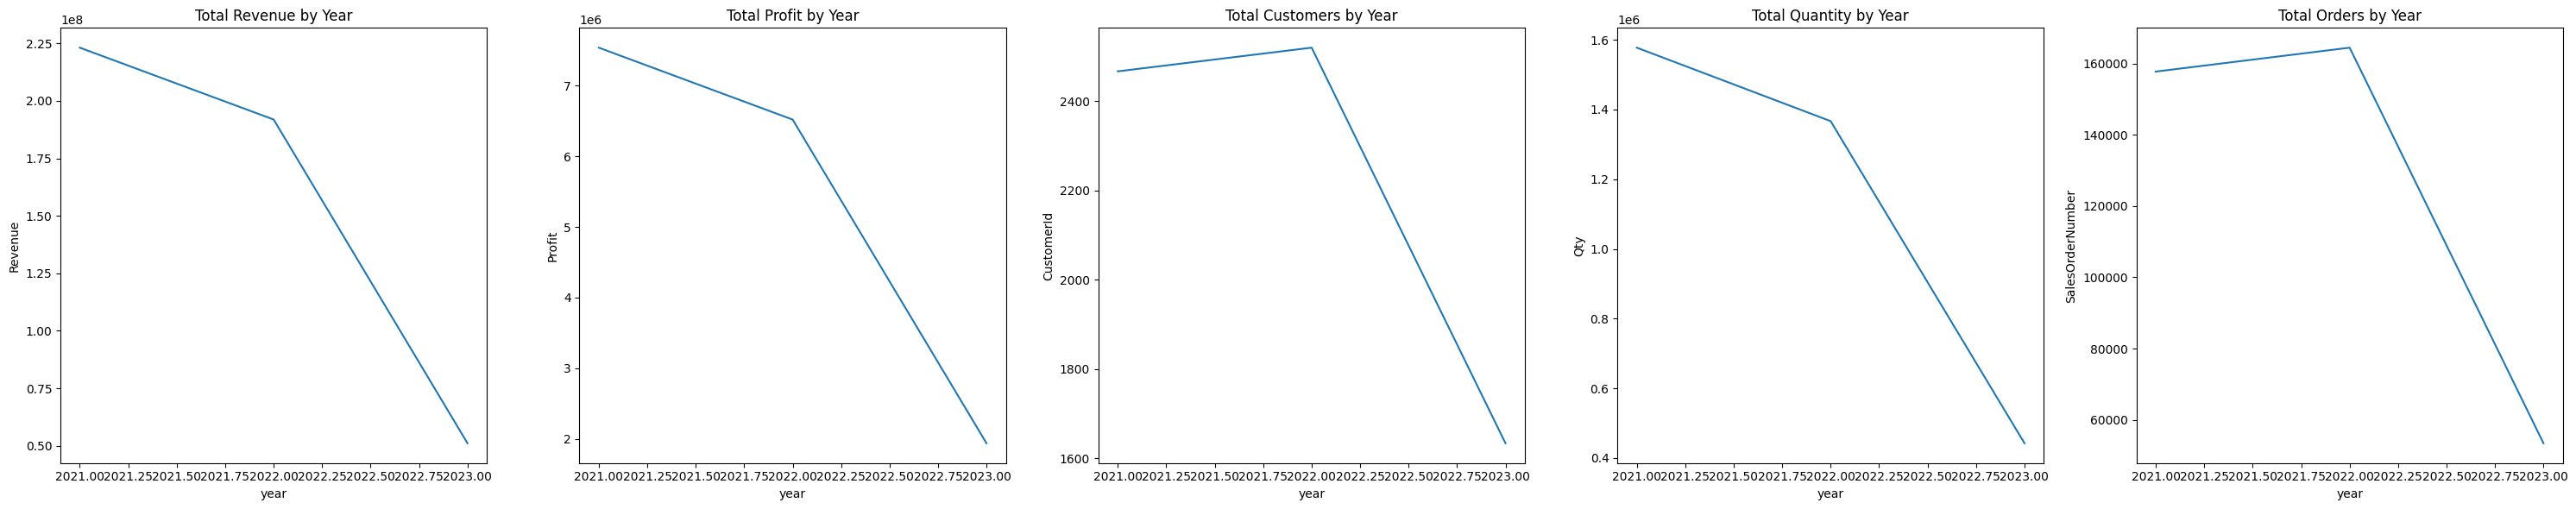

In [78]:


# Calculate total revenue, profit, customers, quantity, and orders by year
yearly_data = df.groupby('year').agg({'Revenue': 'sum', 'Profit': 'sum', 'CustomerId': 'nunique', 'Qty': 'sum', 'SalesOrderNumber': 'nunique'})

# Plot a line chart for each metric
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

sns.lineplot(x=yearly_data.index, y=yearly_data['Revenue'], ax=axs[0])
axs[0].set_title('Total Revenue by Year')

sns.lineplot(x=yearly_data.index, y=yearly_data['Profit'], ax=axs[1])
axs[1].set_title('Total Profit by Year')

sns.lineplot(x=yearly_data.index, y=yearly_data['CustomerId'], ax=axs[2])
axs[2].set_title('Total Customers by Year')

sns.lineplot(x=yearly_data.index, y=yearly_data['Qty'], ax=axs[3])
axs[3].set_title('Total Quantity by Year')

sns.lineplot(x=yearly_data.index, y=yearly_data['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('Total Orders by Year')

plt.tight_layout()
plt.show()


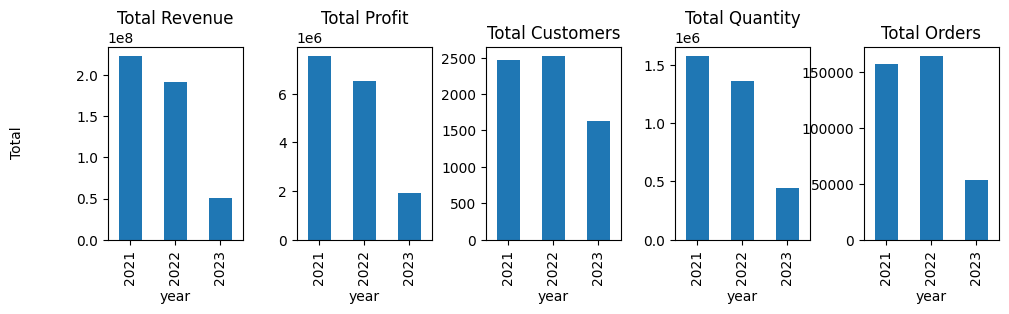

In [79]:

# Calculate the totals for each year and metric
yearly_totals = df.groupby('year').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'CustomerId': 'nunique',
    'Qty': 'sum',
    'SalesOrderNumber': 'nunique'
})

# Plot the bar graphs side by side
fig, axs = plt.subplots(1, 5, figsize=(11.5, 2.5))
yearly_totals['Revenue'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Total Revenue')

yearly_totals['Profit'].plot(kind='bar', ax=axs[1])
axs[1].set_title('Total Profit')

yearly_totals['CustomerId'].plot(kind='bar', ax=axs[2])
axs[2].set_title('Total Customers')

yearly_totals['Qty'].plot(kind='bar', ax=axs[3])
axs[3].set_title('Total Quantity')

yearly_totals['SalesOrderNumber'].plot(kind='bar', ax=axs[4])
axs[4].set_title('Total Orders')

# Set the y-axis labels for each subplot
for ax in axs:
    ax.set_ylabel('')

# Add a common y-axis label
fig.text(0.04, 0.5, 'Total', va='center', rotation='vertical')

# Add a common title
# fig.suptitle('Year on Year Sales Trends')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()

### 15.Customer analysis

1. number of distinct customers for 2021, 2022, 2023

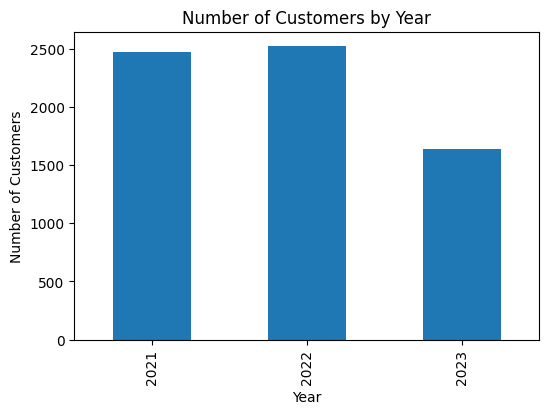

In [80]:
# Group the data by year and count the number of unique customers
yearly_customers = df.groupby('year')['CustomerId'].nunique()

# Plot the results as a bar graph
yearly_customers.plot(kind='bar', figsize=(6,4))
plt.title('Number of Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()

customer analysis for 2021 and 2022

In [81]:
# Group the data by year and count the number of unique customers in each group
yearly_customers = df.groupby('year')['CustomerId'].nunique()

# Print the yearly customer counts
yearly_customers.head()

year
2021    2467
2022    2520
2023    1634
Name: CustomerId, dtype: int64

In [82]:
# Get the set of customers in year 1 and year 2 and year 3
customers_2021 = set(df[df['year'] == 2021]['CustomerId'])
customers_2022 = set(df[df['year'] == 2022]['CustomerId'])
customers_2023 = set(df[df['year'] == 2023]['CustomerId'])

In [83]:
# Get the set of customers repeated in 2022
repeated_customers_2022 = customers_2022.intersection(customers_2021)

# Get the set of customers lost in 2022
lost_customers_2022 = customers_2021 - customers_2022

# Get the set of newly added customers in 2022
new_customers_2022 = customers_2022 - customers_2021

print(f"Number of repeated customers in 2022: {len(repeated_customers_2022)}")
print(f"Number of lost customers in 2022: {len(lost_customers_2022)}")
print(f"Number of newly added customers in 2022: {len(new_customers_2022)}")

Number of repeated customers in 2022: 1795
Number of lost customers in 2022: 672
Number of newly added customers in 2022: 725


In [84]:
# Get the set of customers who are repeated in 2022 and 2023
repeated_customers_2023 = customers_2022.intersection(customers_2023)

# Get the set of customers who are in 2022 but not in 2023
lost_customers_2023 = customers_2022 - customers_2023

# Get the set of customers who are in 2023 but not in 2022
new_customers_2023 = customers_2023 - customers_2022

print(f"Number of repeated customers in 2022 and 2023: {len(repeated_customers_2023)}")
print(f"Number of lost customers in 2023: {len(lost_customers_2023)}")
print(f"Number of newly added customers in 2023: {len(new_customers_2023)}")

Number of repeated customers in 2022 and 2023: 1458
Number of lost customers in 2023: 1062
Number of newly added customers in 2023: 176


In [85]:
# Calculate the set of repeated customers
repeated_customers_from_2021 = customers_2023.intersection(customers_2021)
# Calculate the set of lost customers
lost_customers_in_2023 = customers_2021 - customers_2023
# Calculate the set of newly added customers
new_customers_of_2023 = customers_2023 - customers_2021

# Print the number of customers in each category
print(f"Number of repeated customers: {len(repeated_customers_from_2021)}")
print(f"Number of lost customers: {len(lost_customers_in_2023)}")
print(f"Number of newly added customers: {len(new_customers_of_2023)}")

Number of repeated customers: 1240
Number of lost customers: 1227
Number of newly added customers: 394


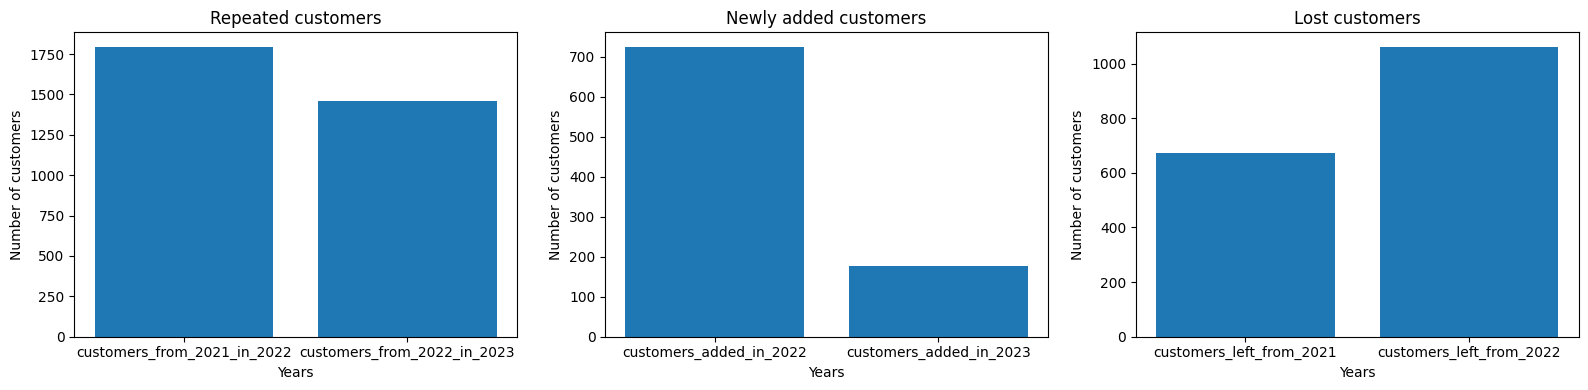

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Bar graph for repeated customers
axs[0].bar(['customers_from_2021_in_2022', 'customers_from_2022_in_2023'], [len(repeated_customers_2022), len(repeated_customers_2023)])
axs[0].set_title('Repeated customers')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Number of customers')

# Bar graph for newly added customers
axs[1].bar(['customers_added_in_2022', 'customers_added_in_2023'], [len(new_customers_2022), len(new_customers_2023)])
axs[1].set_title('Newly added customers')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Number of customers')

# Bar graph for lost customers
axs[2].bar(['customers_left_from_2021', 'customers_left_from_2022'], [len(lost_customers_2022), len(lost_customers_2023)])
axs[2].set_title('Lost customers')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Number of customers')

plt.tight_layout()
plt.show()


In [87]:
# Filter the data for repeated customers in 2022
repeated_customers_2022_data = df[(df['year'] == 2022) & (df['CustomerId'].isin(repeated_customers_2022))]

# Calculate the revenue, profit, and total number of orders made by the repeated customers in 2022
repeated_customers_2022_metrics = repeated_customers_2022_data.groupby('CustomerId').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'SalesOrderNumber': 'nunique'
})

# Print the results
print(repeated_customers_2022_metrics)

                  Revenue        Profit  SalesOrderNumber
CustomerId                                               
100000003      508.994123     27.499338                 4
100000005     1054.072856     22.012362                 2
100000015      864.713931    103.031636                 2
100000034    21783.373520   1873.045531               285
100000038     4328.703118    661.015618                 7
...                   ...           ...               ...
100020941     2969.275500    171.945120                 3
100020966      770.736917   -107.588927                 3
100021080     2960.456590    230.677888                 6
100021191   389902.342948  14950.180364              1727
100021304       50.237157      8.965150                 3

[1795 rows x 3 columns]


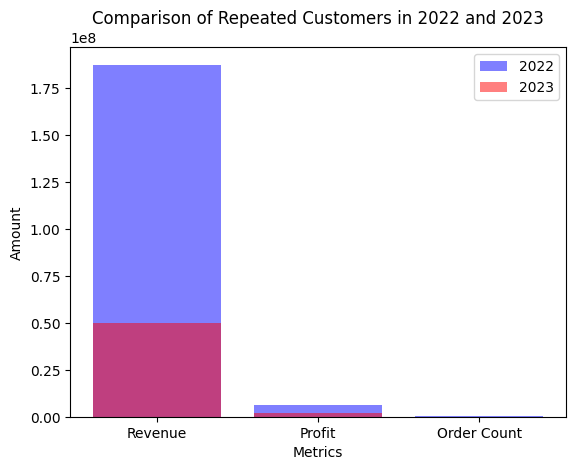

In [88]:
# Calculate revenue, profit, and total number of orders made by repeated customers in 2022 and 2023
repeated_customers_2022_revenue = df[(df['CustomerId'].isin(repeated_customers_2022)) & (df['year'] == 2022)]['Revenue'].sum()
repeated_customers_2022_profit = df[(df['CustomerId'].isin(repeated_customers_2022)) & (df['year'] == 2022)]['Profit'].sum()
repeated_customers_2022_order_count = df[(df['CustomerId'].isin(repeated_customers_2022)) & (df['year'] == 2022)]['SalesOrderNumber'].nunique()

repeated_customers_2023_revenue = df[(df['CustomerId'].isin(repeated_customers_2023)) & (df['year'] == 2023)]['Revenue'].sum()
repeated_customers_2023_profit = df[(df['CustomerId'].isin(repeated_customers_2023)) & (df['year'] == 2023)]['Profit'].sum()
repeated_customers_2023_order_count = df[(df['CustomerId'].isin(repeated_customers_2023)) & (df['year'] == 2023)]['SalesOrderNumber'].nunique()

# Create a bar chart comparing revenue, profit, and total number of orders made by repeated customers in 2022 and 2023
plt.bar(['Revenue', 'Profit', 'Order Count'], [repeated_customers_2022_revenue, repeated_customers_2022_profit, repeated_customers_2022_order_count], color='blue', alpha=0.5, label='2022')
plt.bar(['Revenue', 'Profit', 'Order Count'], [repeated_customers_2023_revenue, repeated_customers_2023_profit, repeated_customers_2023_order_count], color='red', alpha=0.5, label='2023')
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.title('Comparison of Repeated Customers in 2022 and 2023')
plt.legend()
plt.show()

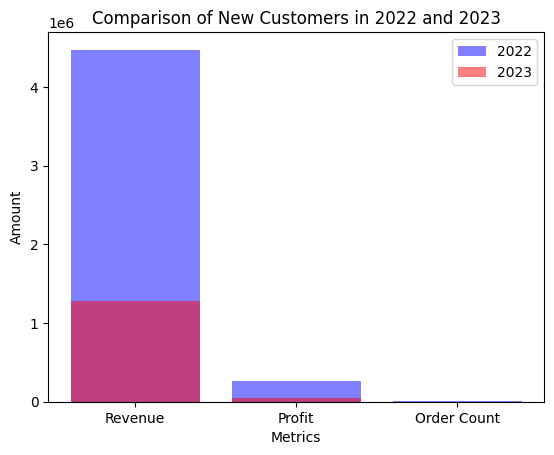

In [89]:
# Calculate revenue, profit, and total number of orders made by new customers in 2022 and 2023
new_customers_2022_revenue = df[(df['CustomerId'].isin(new_customers_2022)) & (df['year'] == 2022)]['Revenue'].sum()
new_customers_2022_profit = df[(df['CustomerId'].isin(new_customers_2022)) & (df['year'] == 2022)]['Profit'].sum()
new_customers_2022_order_count = df[(df['CustomerId'].isin(new_customers_2022)) & (df['year'] == 2022)]['SalesOrderNumber'].nunique()

new_customers_2023_revenue = df[(df['CustomerId'].isin(new_customers_2023)) & (df['year'] == 2023)]['Revenue'].sum()
new_customers_2023_profit = df[(df['CustomerId'].isin(new_customers_2023)) & (df['year'] == 2023)]['Profit'].sum()
new_customers_2023_order_count = df[(df['CustomerId'].isin(new_customers_2023)) & (df['year'] == 2023)]['SalesOrderNumber'].nunique()

# Create a bar chart comparing revenue, profit, and total number of orders made by new customers in 2022 and 2023
plt.bar(['Revenue', 'Profit', 'Order Count'], [new_customers_2022_revenue, new_customers_2022_profit, new_customers_2022_order_count], color='blue', alpha=0.5, label='2022')
plt.bar(['Revenue', 'Profit', 'Order Count'], [new_customers_2023_revenue, new_customers_2023_profit, new_customers_2023_order_count], color='red', alpha=0.5, label='2023')
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.title('Comparison of New Customers in 2022 and 2023')
plt.legend()
plt.show()

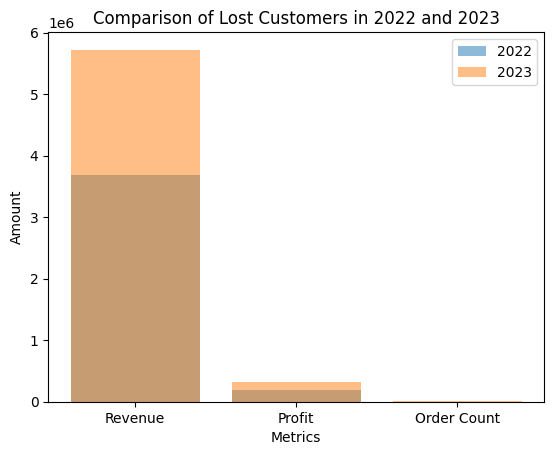

In [90]:
# Calculate revenue, profit, and total number of orders made by lost customers in 2022 and 2023
lost_customers_2022_revenue = df[(df['CustomerId'].isin(lost_customers_2022)) & (df['year'] == 2021)]['Revenue'].sum()
lost_customers_2022_profit = df[(df['CustomerId'].isin(lost_customers_2022)) & (df['year'] == 2021)]['Profit'].sum()
lost_customers_2022_order_count = df[(df['CustomerId'].isin(lost_customers_2022)) & (df['year'] == 2021)]['SalesOrderNumber'].nunique()

lost_customers_2023_revenue = df[(df['CustomerId'].isin(lost_customers_2023)) & (df['year'] == 2022)]['Revenue'].sum()
lost_customers_2023_profit = df[(df['CustomerId'].isin(lost_customers_2023)) & (df['year'] == 2022)]['Profit'].sum()
lost_customers_2023_order_count = df[(df['CustomerId'].isin(lost_customers_2023)) & (df['year'] == 2022)]['SalesOrderNumber'].nunique()

# Create a bar chart comparing revenue, profit, and total number of orders made by lost customers in 2022 and 2023
plt.bar(['Revenue', 'Profit', 'Order Count'], [lost_customers_2022_revenue, lost_customers_2022_profit, lost_customers_2022_order_count], alpha=0.5, label='2022')
plt.bar(['Revenue', 'Profit', 'Order Count'], [lost_customers_2023_revenue, lost_customers_2023_profit, lost_customers_2023_order_count], alpha=0.5, label='2023')
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.title('Comparison of Lost Customers in 2022 and 2023')
plt.legend()
plt.show()


In [91]:
lost_customers_2022_revenue = df[(df['CustomerId'].isin(lost_customers_2022)) & (df['year'] == 2021)]['Revenue'].sum()
print(lost_customers_2022_revenue)

3689963.623771754


In [92]:
lost_customers_2023_revenue = df[(df['CustomerId'].isin(lost_customers_2023)) & (df['year'] == 2022)]['Revenue'].sum()
print(lost_customers_2023_revenue)

5722639.2687255135


In [93]:
df.head()

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName,year,month_year,Quarter
0,100002803,2913843,10,2021-02-04,2,Microsoft,Operating System Software,1000477.0,254.213783,1.271048,0.0,Components North,2021,2021-02,1
1,100003323,2918083,50,2021-02-04,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North,2021,2021-02,1
2,100016168,2916878,20,2021-02-04,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North,2021,2021-02,1
3,100001590,2470475,10,2021-02-04,10,Lenovo,Notebook Computers,1000133.0,21362.979640,133.944138,0.0,Corporate South,2021,2021-02,1
4,100001590,2544987,10,2021-02-04,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South,2021,2021-02,1


In [94]:
df.to_csv('anon_modified_data.csv', index=False)